<center> <img src=https://i.imgur.com/0TSSaqL.png width="550"> </center>
*
<center> <h3> Module 7: IA Fundamentals: Machine Learning </h3> </center>
<center> <h4> Classification models </h4> </center>
*

###**WORKING ENVIRONMENT SET UP**

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline

# ML Libraries
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


# Tree Visualization
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot

# Save model / deployment
import pickle
import sys


## 1.- Load Data

El dataset consiste en un conjunto de 19 parámetros calculados a partir registros de campañas pasadas asociadas al cliente. Estas variables, recogen distintas características del cliente, desde su edad, estado civil, educación así como información asociada a la cuenta.


**Descripción del dataset**

Este problema de clasificación binaria tiene como objetivo predecir si el cliente suscribirá un depósito bancario a plazo (variable **output**).

Variables de entrada:

#### Bank client data:
- **age** (numeric)

- **job**: type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

- **marital_status** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

- **education_level** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

- **is_default**: has credit in default? (categorical: "no","yes","unknown")

- **housing_type**: has housing loan? (categorical: "no","yes","unknown")

- **loan:** has personal loan? (categorical: "no","yes","unknown")

#### Related with the last contact of the current campaign:

- **contact:** contact communication type (categorical: "cellular","telephone")

- **month:** last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

- **day_of_week:** last contact day of the week (categorical: "mon","tue","wed","thu","fri")

##### Other attributes:
- **campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)

- **pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

- **previous:** number of contacts performed before this campaign and for this client (numeric)

- **poutcome:** outcome of the previous marketing campaign (categorical: "failure", "nonexistent", "success")

##### Social and economic context attributes
- **emp_var_rate:** employment variation rate - quarterly indicator (numeric)

- **cons_price_index:** consumer price index - monthly indicator (numeric)

- **cons_conf_index**: consumer confidence index - monthly indicator (numeric)

- **euribor_3m:** euribor 3 month rate - daily indicator (numeric)

- **n_employed**: number of employees - quarterly indicator (numeric)

##### Output variable (desired target):
- **output**: - has the client subscribed a term deposit? (binary: "yes","no")

In [ ]:
Local = True

In [ ]:



if Local == True:
    !gdown https://drive.google.com/uc?id=1X7AIcMKUOA7-nOUptjo2Cx6lL4hIIHzQ
    # https://drive.google.com/file/d/1nxD5meFAO-NvDhuteBJ7KgifG10Bfsoa/view?usp=sharing
    train_df = pd.read_csv('train.csv').drop('id', axis=1)
else:
    train_df = pd.read_csv("/kaggle/input/2310-machine-learning-avanzado-immune/train.csv").drop('id', axis=1)

Downloading...
From: https://drive.google.com/uc?id=1X7AIcMKUOA7-nOUptjo2Cx6lL4hIIHzQ
To: /content/train.csv
100% 3.98M/3.98M [00:00<00:00, 215MB/s]


In [ ]:
train_df = pd.read_csv('train.csv').drop('id', axis=1)

In [ ]:
train_df.head()

,age,job,marital_status,education_level,is_default,housing_type,loan,contact,month,day_of_week,campaing,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,euribor_3m,n_employed,output
0,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


## 2.- Exploratory Data Analysis (Data Understanding / Descriptive Analysis)

In [ ]:
df = train_df.copy()

## Análisis Univariable

In [ ]:
df.dtypes

,0
age,int64
job,object
marital_status,object
education_level,object
is_default,object
housing_type,object
loan,object
contact,object
month,object
day_of_week,object


In [ ]:
#Describe de variables numéricas<<<
df.describe()

,age,campaing,pdays,previous,emp_var_rate,cons_price_index,cons_conf_index,euribor_3m,n_employed,output
count,33108.000000,33108.000000,33108.000000,33108.000000,33108.000000,33108.000000,33108.000000,33108.000000,33108.000000,33108.000000
mean,40.038873,2.572188,961.659418,0.172859,0.079851,93.575062,-40.491199,3.619698,5166.970572,0.113628
std,10.403943,2.775783,188.907729,0.493891,1.573452,0.579885,4.628888,1.735692,72.329138,0.317364
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


- Age: No es una distribución normal, aunque se le parece. Los datos están mayormente dispersos entre [40.04 - 10.40, 40.04 + 10.40]. La media es de 40.04 con una desviación estándar de 10.40. La mediana (38.0) es menor que la media, lo que sugiere un sesgo positivo (skewness positivo).

- Campaign:  No es una distribución normal. La media es de 2.57 con una desviación estándar de 2.78, y los valores están principalmente entre [2.57 - 2.78, 2.57 + 2.78]. La mediana (2.0) es menor que la media, lo cual también indica un sesgo positivo. El valor máximo (56) es considerablemente alto comparado con el percentil 75 (3.0), lo que indica la presencia de outliers.

- Pdays: Tiene un comportamiento peculiar: el valor más frecuente (mediana = 999 y Q1=999, Q3=999) sugiere que 999 puede ser un marcador especial (por ejemplo, que el cliente no fue contactado anteriormente). A pesar de una media de 961.66 y desviación estándar de 188.91, esta variable no refleja una distribución normal y debe analizarse de forma especial (posiblemente como variable categórica).

- Previous: La media es de 0.17 y la desviación estándar de 0.49, lo que indica que en su mayoría los valores están concentrados en torno a 0. La mediana es 0, igual al mínimo, lo que muestra un gran número de ceros. Esto puede implicar que la mayoría de clientes no habían sido contactados antes. Distribución con sesgo positivo, ya que hay valores máximos de hasta 7.

- Emp_var_rate (tasa de variación del empleo): Los valores se concentran entre [0.08 - 1.57, 0.08 + 1.57]. La media (0.08) y la mediana (1.1) están muy separadas, lo que indica un sesgo negativo considerable. También hay un mínimo de -3.4, que podría considerarse un outlier.

- Cons_price_index (índice de precios al consumo): No sigue una distribución normal. La media es de 93.58 con una desviación de 0.58, lo que implica que los datos están bastante concentrados entre [93.58 - 0.58, 93.58 + 0.58]. La mediana (93.749) es algo mayor que la media, lo que sugiere un leve sesgo negativo.

- Cons_conf_index (índice de confianza del consumidor): La media es de -40.49 con una desviación de 4.63. La mediana (-41.8) es menor que la media, lo que sugiere un sesgo positivo leve. Los datos se encuentran mayoritariamente entre [-40.49 - 4.63, -40.49 + 4.63].

- Euribor_3m: La media es de 3.62 con una desviación estándar de 1.74. La mediana es 4.857, considerablemente mayor que la media, lo cual indica un sesgo negativo importante. El valor mínimo (0.634) es muy bajo, reforzando este sesgo.

- N_employed (número de empleados): La media es de 5166.97 con una desviación estándar de 72.33. Los datos están principalmente entre [5166.97 - 72.33, 5166.97 + 72.33]. La mediana (5191) es mayor que la media, lo que sugiere un sesgo negativo. El valor mínimo (4963.6) y el máximo (5228.1) están dentro de un rango razonable.

- Output (variable objetivo): Es una variable binaria (0 o 1), donde la media es 0.1136. Esto indica que solo el 11.36% de los registros tienen un resultado positivo (valor 1). La distribución está fuertemente desbalanceada hacia el 0, lo cual es relevante si se usa para clasificación.


Ninguna de las variables tiene valores nulos.

In [ ]:
df.describe(include=['object'])

,job,marital_status,education_level,is_default,housing_type,loan,contact,month,day_of_week,poutcome
count,33108,33108,33108,33108,33108,33108,33108,33108,33108,33108
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,8402,20066,9800,26209,17364,27282,21029,11061,6906,28586


- job: Se identifican 12 valores únicos para la variable "job", siendo el más frecuente "admin." con 8,402 apariciones.

- marital_status: Hay 4 categorías distintas; la moda es "married", que se repite 20,066 veces.

- education_level: Presenta 8 niveles educativos diferentes. La categoría más común es "university.degree", con una frecuencia de 9,800.

- is_default: Tiene 3 valores únicos. El más común es "no", registrado 26,209 veces.

- housing_type: Solo hay 3 tipos distintos, con "yes" como categoría más frecuente, apareciendo 17,364 veces.

- loan: También con 3 valores únicos, su moda es "no", que ocurre en 27,282 registros.

- contact: Tiene 2 tipos de contacto, siendo "cellular" el más común, con 21,029 casos.

- month: Se presentan 10 meses distintos. La mayoría de las interacciones ocurrieron en "may", con 11,061 registros.

- day_of_week: Contiene 5 valores únicos, donde "thu" es el más frecuente, con 6,906 apariciones.

- poutcome: Solo hay 3 resultados de campaña anteriores, siendo "nonexistent" el más repetido, con 28,586 casos, lo que puede sugerir que muchas personas no fueron contactadas anteriormente.

**Resumen de los resultados**

Con base en este análisis, la mayoría de los individuos registrados en el dataset trabajan en administración, están casados, poseen título universitario, no tienen historial de impago, cuentan con vivienda, no tienen préstamos personales, fueron contactados por teléfono celular durante el mes de mayo, en su mayoría un jueves, y no participaron en campañas anteriores.

Además, no se detectan valores nulos en ninguna de las variables categóricas, ya que el número de registros es consistente (33,108) en todas ellas.


También podemos comprobar los valores únicos de las variables categóricas con unique. De manera que comprobaremos su relevancia:


In [ ]:
df['job'].unique()

array(['services', 'admin.', 'blue-collar', 'technician', 'housemaid',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [ ]:
df['marital_status'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [ ]:
df['education_level'].unique()

array(['high.school', 'basic.6y', 'basic.9y', 'professional.course',
       'unknown', 'basic.4y', 'university.degree', 'illiterate'],
      dtype=object)

In [ ]:
df['is_default'].unique()

array(['unknown', 'no', 'yes'], dtype=object)

In [ ]:
df['housing_type'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [ ]:
df['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [ ]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [ ]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [ ]:
df['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [ ]:
df['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

** Observaciones: **

- Hay varias variables con valores "unknown", que deberían tratarse con cuidado: pueden necesitar imputación, filtrado o análisis específico.

- El número de categorías por variable es razonable, lo cual facilita la codificación para modelos de machine learning.

- Las variables de tipo binario (como loan, housing_type o is_default) tienen un formato estándar, útil para modelos supervisados.

- Variables como education_level o job aportan alta granularidad, aunque quizás convenga agruparlas para evitar demasiada dispersión.

- El campo poutcome puede tener gran importancia predictiva, al reflejar interacciones pasadas con el sistema.

### Agrupar variables

In [ ]:
# Agrupación para la variable 'job'
job_map = {
    'admin.': 'white-collar',
    'management': 'white-collar',
    'technician': 'skilled-labor',
    'services': 'skilled-labor',
    'blue-collar': 'manual-labor',
    'housemaid': 'manual-labor',
    'self-employed': 'self-employed',
    'entrepreneur': 'self-employed',
    'retired': 'retired',
    'student': 'student',
    'unemployed': 'unemployed',
    'unknown': 'unknown'
}
df['job_grouped'] = df['job'].map(job_map)

# Agrupación para 'education_level'
education_map = {
    'illiterate': 'no_education',
    'basic.4y': 'basic_education',
    'basic.6y': 'basic_education',
    'basic.9y': 'basic_education',
    'high.school': 'secondary',
    'university.degree': 'higher_education',
    'professional.course': 'higher_education',
    'unknown': 'unknown'
}
df['education_grouped'] = df['education_level'].map(education_map)

In [ ]:
df[['job', 'job_grouped']].value_counts()
df[['education_level', 'education_grouped']].value_counts()


,,count
education_level,education_grouped,
university.degree,higher_education,9800
high.school,secondary,7630
basic.9y,basic_education,4817
professional.course,higher_education,4258
basic.4y,basic_education,3332
basic.6y,basic_education,1873
unknown,unknown,1384
illiterate,no_education,14


### Outliers

##### Métodos IQR y Zscore

In [ ]:
def outliers_zscore(df:pd.DataFrame, colname:str, threshold: int=3) -> pd.DataFrame:
  """
  calculates the outliers for the given column with the ZScore method.
  """
  z_scores = stats.zscore(df[colname])
  outliers = (np.abs(z_scores) > threshold)

  return df[outliers]

def outliers_iqr(df:pd.DataFrame, colname:str) -> pd.DataFrame:
  """
  calculates outliers for the given column with the IQR method.
  """
  q1 = df[colname].quantile(0.25)
  q3 = df[colname].quantile(0.75)
  iqr = q3-q1

  outliers = ((df[colname] < q1 - 1.5 * iqr) | (df[colname] > q3 + 1.5 * iqr))
  return df[outliers]

Debido a que los datos no están normalizados y observamos cierta asimetría en algunas variables, utilizaremos el método IQR:

In [ ]:
for col in df.select_dtypes(include='number'):
  outliers = outliers_iqr(df, col)
  print(f"column: {col}, number of outliers: {len(outliers)}")
  print(80*"-")

column: age, number of outliers: 375
--------------------------------------------------------------------------------
column: campaing, number of outliers: 1930
--------------------------------------------------------------------------------
column: pdays, number of outliers: 1245
--------------------------------------------------------------------------------
column: previous, number of outliers: 4522
--------------------------------------------------------------------------------
column: emp_var_rate, number of outliers: 0
--------------------------------------------------------------------------------
column: cons_price_index, number of outliers: 0
--------------------------------------------------------------------------------
column: cons_conf_index, number of outliers: 359
--------------------------------------------------------------------------------
column: euribor_3m, number of outliers: 0
--------------------------------------------------------------------------------
column

**Conclusión General del Análisis de Outliers (Método IQR)**

- La mayoría de las variables presentan outliers detectables, especialmente aquellas relacionadas con la frecuencia de contacto (campaign, pdays, previous), lo que sugiere comportamientos extremos o valores codificados especiales.

- Las variables macroeconómicas (emp_var_rate, cons_price_index, euribor_3m, n_employed) no presentan outliers, indicando buena calidad y estabilidad en esos datos.

- Algunos outliers como los de pdays probablemente no representan errores, sino categorías especiales (como no contactado previamente).

- La variable output contiene muchos valores marcados como outliers, pero no debería limpiarse automáticamente, ya que es la variable objetivo.

En general, muchos outliers reflejan comportamientos reales extremos más que errores, por lo que se recomienda tratarlos con técnicas como capping, transformación o flags en lugar de eliminarlos.



### Prueba de normalidad con normaltest

In [ ]:
from scipy.stats import normaltest


for col in df.select_dtypes(include='float'):
  _, p_value = normaltest(df[col], nan_policy='omit')

  if p_value < 0.05:
    print('❌data does not come from a normal distribution')
  else:
    print('✅ likely come from a normal distribution')

❌data does not come from a normal distribution
❌data does not come from a normal distribution
❌data does not come from a normal distribution
❌data does not come from a normal distribution
❌data does not come from a normal distribution


Skewness

In [ ]:
from scipy.stats import skew

# Calcular el skewness de la tarifa
for col in df.select_dtypes(include='number'):

  skewness = skew(df[col].dropna())
  print(f'Skewness de la {col}: {skewness}')

Skewness de la age: 0.7831316717543689
Skewness de la campaing: 4.81466590395626
Skewness de la pdays: -4.861383505177238
Skewness de la previous: 3.815528746289769
Skewness de la emp_var_rate: -0.7236930260842995
Skewness de la cons_price_index: -0.2319986492941577
Skewness de la cons_conf_index: 0.3036439254098668
Skewness de la euribor_3m: -0.7075370175803651
Skewness de la n_employed: -1.0419742188072787
Skewness de la output: 2.434919424078534


El análisis de skewness revela que varias variables del dataset presentan distribuciones no simétricas, lo cual puede afectar modelos sensibles a la forma de los datos.

🔺 Asimetría Positiva:
- campaign (4.81) y previous (3.81): Altamente sesgadas a la derecha. La mayoría de los clientes tuvieron pocos contactos, pero algunos casos extremos elevan la cola.

- output (2.43): También sesgada positivamente, sugiere desequilibrio de clases.

- age (0.78): Leve asimetría positiva, con algunos registros de edad avanzada.

🔻 Asimetría Negativa:
- pdays (-4.86): Fuertemente sesgada por el valor especial 999 (no contactado).

- n_employed (-1.04), emp_var_rate (-0.72) y euribor_3m (-0.71): Sesgo moderado a la izquierda, común en variables macroeconómicas.

⚖️ Casi simétricas:
cons_conf_index (0.30) y cons_price_index (-0.23): Distribución equilibrada, sin necesidad de ajuste inmediato.

🧩 Conclusión:
Variables como campaign, previous, pdays y output presentan alta asimetría y podrían beneficiarse de transformaciones logarítmicas, binarización o escalado para mejorar el rendimiento del modelo. Las variables macroeconómicas, aunque algo sesgadas, son estables y no requieren ajustes urgentes.





### Modificación del dataset

In [ ]:
# Tamaño del dataset
print("Dimensiones del dataset:", train_df.shape)

# Vista previa de los datos
train_df.head()


Dimensiones del dataset: (33108, 20)


,age,job,marital_status,education_level,is_default,housing_type,loan,contact,month,day_of_week,campaing,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,euribor_3m,n_employed,output
0,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


Algunas variables pueden tener el valor 'unknown', lo cual no aparece como nulo (NaN), pero funciona como un dato perdido o poco informativo. Identificarlos es clave para tomar decisiones

In [ ]:
# Extraemos las columnas categóricas
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Variables categóricas:")
print(categorical_cols)

# Contamos cuántos valores 'unknown' hay en cada una
unknowns = {}
for col in categorical_cols:
    count = (df[col] == 'unknown').sum()
    if count > 0:
        unknowns[col] = count

# Mostramos en forma de tabla
unknown_summary = pd.DataFrame.from_dict(unknowns, orient='index', columns=['unknown_count'])
unknown_summary['% del total'] = (unknown_summary['unknown_count'] / len(df)) * 100
unknown_summary.sort_values('% del total', ascending=False)


Variables categóricas:
['job', 'marital_status', 'education_level', 'is_default', 'housing_type', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'job_grouped', 'education_grouped']


,unknown_count,% del total
is_default,6897,20.831823
education_level,1384,4.180259
education_grouped,1384,4.180259
housing_type,808,2.440498
loan,808,2.440498
job,249,0.752084
job_grouped,249,0.752084
marital_status,66,0.199348


Aquí podemos observar varias variables categóricas con valores 'unknown', siendo la más afectada is_default, con un 20.8% de datos desconocidos. También destacan education_level (4.2%), housing_type y loan (ambas con 2.4%), mientras que job y marital_status presentan una proporción muy baja (menos del 1%). Este tipo de valores puede comprometer la calidad del análisis si no se tratan adecuadamente antes de aplicar modelos de machine learning.

Como primera medida, podemos mantener 'unknown' como una categoría explícita en el caso de is_default, ya que su frecuencia elevada podría indicar un patrón significativo (por ejemplo, personas que no reportan si están en default podrían tener un perfil particular). Para las columnas con valores más moderados como education_level, housing_type y loan, es aconsejable imputar con la moda (el valor más frecuente) o utilizar un modelo predictivo si se quiere ser más preciso. En el caso de job y marital_status, dado que el número de valores desconocidos es bajo, se puede optar por eliminar esos registros o simplemente imputarlos también con la moda.

Aplicando estos cambios podremos conservar la mayor parte de la información y preparan el conjunto de datos para un modelado más robusto, evitando sesgos o pérdidas significativas de datos.

### Análisis con seaborn

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33108 entries, 0 to 33107
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                33108 non-null  int64  
 1   job                33108 non-null  object 
 2   marital_status     33108 non-null  object 
 3   education_level    33108 non-null  object 
 4   is_default         33108 non-null  object 
 5   housing_type       33108 non-null  object 
 6   loan               33108 non-null  object 
 7   contact            33108 non-null  object 
 8   month              33108 non-null  object 
 9   day_of_week        33108 non-null  object 
 10  campaing           33108 non-null  int64  
 11  pdays              33108 non-null  int64  
 12  previous           33108 non-null  int64  
 13  poutcome           33108 non-null  object 
 14  emp_var_rate       33108 non-null  float64
 15  cons_price_index   33108 non-null  float64
 16  cons_conf_index    331

### Top 5 gráficos más relevantes


#### Countplot de output

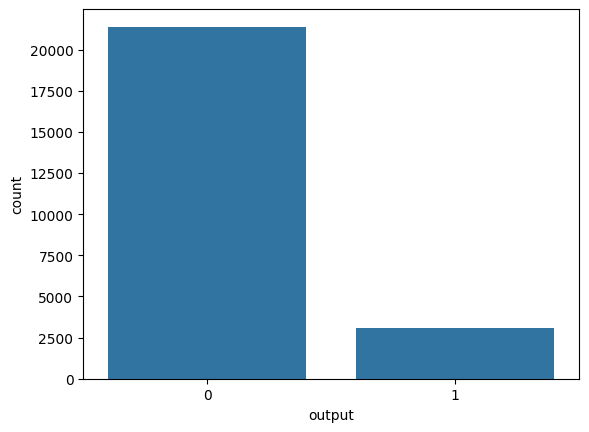

In [ ]:
# Create a countplot
sns.countplot(x="output", data=df)
plt.show()

Este gráfico muestra la distribución del campo output, que indica si el cliente contrató un depósito a plazo. La mayoría de los clientes no aceptaron la oferta (clase 0), superando los 900 registros, mientras que sólo una minoría sí aceptó (clase 1), con poco más de 100 casos.

La muestra está claramente desbalanceada, lo que puede sesgar los modelos predictivos hacia la clase mayoritaria. Será importante aplicar técnicas de balanceo o usar métricas adecuadas para evaluar el desempeño real del modelo. Además, conviene explorar qué características distinguen a los pocos clientes que dijeron “sí”.


#### Histograma con KDE de age

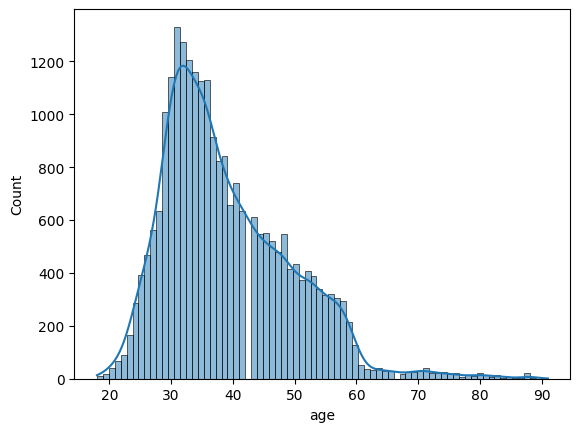

In [ ]:
sns.histplot(df['age'], kde=True)
plt.show()

Este gráfico muestra la distribución de edades de los clientes en el dataset. La mayoría se concentra entre los 30 y 40 años, con un pico alrededor de los 32-35 años, y una disminución progresiva hacia edades mayores.

La distribución tiene una asimetría negativa, con pocos casos por encima de los 60 años y muy pocos extremos cercanos a los 90. Esto sugiere que el banco se enfoca principalmente en adultos jóvenes y de mediana edad, que probablemente representan su público objetivo para productos financieros como depósitos a plazo.

Un análisis interesante sería explorar si la edad influye en la decisión de contratar un depósito, o si ciertos rangos etarios responden mejor a las campañas comerciales.


#### Box plot de balance

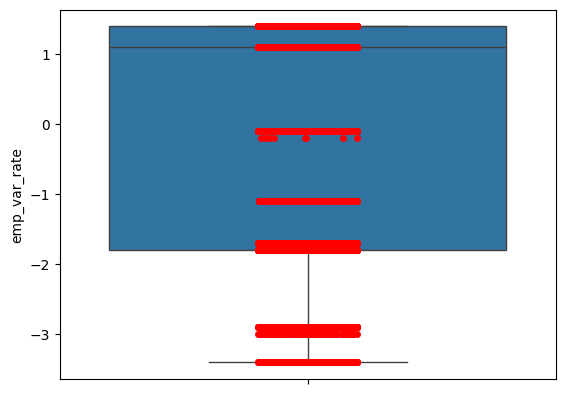

In [ ]:
sns.boxplot(df['emp_var_rate'])
sns.stripplot(df['emp_var_rate'], color='red')
plt.show()

Este boxplot muestra la distribución de la variable emp_var_rate, que refleja la variación del empleo. La mayoría de los valores están entre -2 y +1.4, con un pico cerca de 1.1, lo que indica un entorno laboral positivo en muchas campañas.

Sin embargo, hay varios outliers negativos, lo que sugiere que también se incluyeron periodos económicos difíciles. Esta variable puede influir fuertemente en la decisión de los clientes al contratar un depósito.


#### Count plot de job_grouped

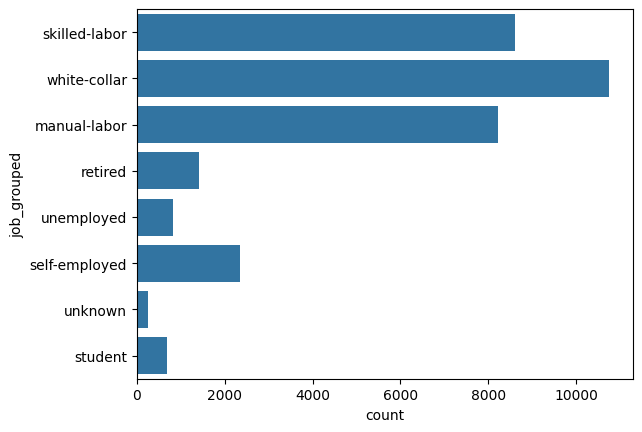

In [ ]:
sns.countplot(df['job_grouped'])
plt.show()

Este gráfico muestra la distribución de ocupaciones tras agruparlas en categorías más amplias (job_grouped). La mayoría de los clientes pertenece a los grupos "white-collar" y "skilled-labor", seguidos por "manual-labor".

Esto sugiere que el dataset está compuesto en su mayoría por personas en edad laboral activa, con empleos administrativos, técnicos o físicos. Las categorías como "retired", "unemployed" y "student" son minoritarias, lo cual puede influir en su capacidad o interés para contratar productos financieros como depósitos. Esta agrupación facilita el análisis de comportamiento por perfil laboral.


#### Pie chart de marital_status

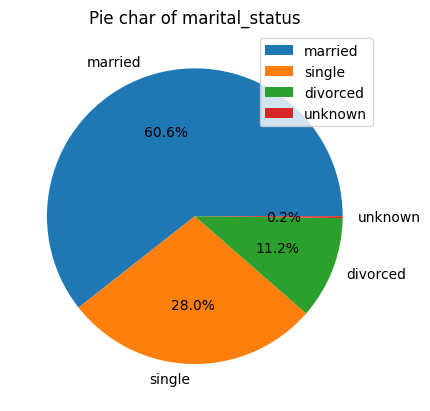

In [ ]:
vc = df['marital_status'].value_counts().reset_index()
keys = vc['marital_status'].to_list()
values = vc['count'].to_list()

plt.pie(values, labels=keys, autopct='%1.1f%%')
plt.legend()
plt.title('Pie char of marital_status')
plt.show()

Este gráfico circular muestra la distribución del estado civil (marital_status) de los clientes. La mayoría está casada (60.6%), seguida por personas solteras (28.0%) y divorciadas (11.2%). El grupo con estado civil desconocido es prácticamente irrelevante (0.2%).

La predominancia de personas casadas podría influir en las decisiones financieras, como la contratación de depósitos, ya que este grupo puede tener mayores responsabilidades económicas o un enfoque más conservador. Comparar el comportamiento entre estados civiles puede revelar patrones valiosos en la toma de decisiones financieras.

## Análisis Multivariable

###Análisis con pandas

####Análisis Continuas VS Continuas

In [ ]:
# calculate the correlation matrix
df.corr(numeric_only=True)

,age,campaing,pdays,previous,emp_var_rate,cons_price_index,cons_conf_index,euribor_3m,n_employed,output
age,1.000000,0.001741,-0.033185,0.027960,0.001312,0.000850,0.129133,0.012724,-0.015338,0.026472
campaing,0.001741,1.000000,0.051973,-0.076775,0.150669,0.129619,-0.013590,0.134940,0.143321,-0.067292
pdays,-0.033185,0.051973,1.000000,-0.590891,0.273400,0.077120,-0.089539,0.300798,0.377213,-0.328495
previous,0.027960,-0.076775,-0.590891,1.000000,-0.420349,-0.200746,-0.050088,-0.455232,-0.503215,0.232538
emp_var_rate,0.001312,0.150669,0.273400,-0.420349,1.000000,0.775889,0.191731,0.972142,0.906938,-0.301702
cons_price_index,0.000850,0.129619,0.077120,-0.200746,0.775889,1.000000,0.054922,0.688875,0.523109,-0.138786
cons_conf_index,0.129133,-0.013590,-0.089539,-0.050088,0.191731,0.054922,1.000000,0.273746,0.097221,0.057704
euribor_3m,0.012724,0.134940,0.300798,-0.455232,0.972142,0.688875,0.273746,1.000000,0.945264,-0.311144
n_employed,-0.015338,0.143321,0.377213,-0.503215,0.906938,0.523109,0.097221,0.945264,1.000000,-0.357851
output,0.026472,-0.067292,-0.328495,0.232538,-0.301702,-0.138786,0.057704,-0.311144,-0.357851,1.000000


#####**Análisis de correlaciones:**

**Factores que más influyen en el resultado (output):**

- pdays (días desde el último contacto): Cuanto más reciente el contacto, mejor el resultado de la campaña.

- previous (contactos previos exitosos): Si ya fue contactado antes, aumenta la probabilidad de éxito.

- emp_var_rate, euribor_3m, n_employed (indicadores económicos): En general, un mejor contexto económico está ligeramente asociado con peores resultados de campaña.

- campaign (número de veces que se contactó en la campaña): Tiene muy poca influencia directa.

**Relaciones destacadas entre variables:**

- Las variables macroeconómicas están muy correlacionadas entre sí (por ejemplo, euribor_3m y n_employed).

- pdays y previous están fuertemente relacionadas: si fue contactado hace poco, es más probable que tenga un historial de interacciones.

- Edad y confianza del consumidor casi no tienen efecto sobre el resultado.

**Conclusión:**
Para predecir si una campaña tendrá éxito, es más útil fijarse en si el cliente ya fue contactado antes y hace cuánto tiempo, más que en la situación económica o cuántas veces lo contactamos ahora.

#### Análisis Continuas VS Categóricas

Primero, hacemos un evaluamos la normalidad de las variables, para saber qué test estadístico utilizamos:

In [ ]:
from scipy.stats import normaltest

for col in df.select_dtypes(include='float'):
    _, p_value = normaltest(df[col], nan_policy='omit')

    if p_value < 0.05:
        print(f"🔴 {col}: No proviene de una distribución normal (p = {p_value:.4f})")
    else:
        print(f"🟢 {col}: Probablemente proviene de una distribución normal (p = {p_value:.4f})")


🔴 emp_var_rate: No proviene de una distribución normal (p = 0.0000)
🔴 cons_price_index: No proviene de una distribución normal (p = 0.0000)
🔴 cons_conf_index: No proviene de una distribución normal (p = 0.0000)
🔴 euribor_3m: No proviene de una distribución normal (p = 0.0000)
🔴 n_employed: No proviene de una distribución normal (p = 0.0000)


Ninguna sigue una distribución normal, por lo que utilizaremos Kruskal-Wallis.

#####Kruskal-Wallis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33108 entries, 0 to 33107
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                33108 non-null  int64  
 1   job                33108 non-null  object 
 2   marital_status     33108 non-null  object 
 3   education_level    33108 non-null  object 
 4   is_default         33108 non-null  object 
 5   housing_type       33108 non-null  object 
 6   loan               33108 non-null  object 
 7   contact            33108 non-null  object 
 8   month              33108 non-null  object 
 9   day_of_week        33108 non-null  object 
 10  campaing           33108 non-null  int64  
 11  pdays              33108 non-null  int64  
 12  previous           33108 non-null  int64  
 13  poutcome           33108 non-null  object 
 14  emp_var_rate       33108 non-null  float64
 15  cons_price_index   33108 non-null  float64
 16  cons_conf_index    331

Comparo todas las variables numéricas con mi variable objetivo o target: "output".

In [ ]:
from scipy.stats import kruskal

# Filtrar solo variables numéricas y excluir 'output'
categoric_vars = [var for var in df.select_dtypes(include='number').columns]

# Iterar sobre todas las variables continuas
for var in categoric_vars:
    grouped_data = [group[var].dropna() for _, group in df.groupby('output')]
    h_statistic, p_value = kruskal(*grouped_data)

    print(f"\n Probando {var} con Output:")
    print(f"H = {h_statistic:.4f}, p-value = {p_value:.4f}")

    if p_value < 0.05:
        print(f"❌ Hay diferencias significativas en {var} entre los grupos de  Output.")
    else:
        print(f"✅ No hay diferencias significativas en {var} entre los grupos de Output.")



 Probando age con Output:
H = 8.8545, p-value = 0.0029
❌ Hay diferencias significativas en age entre los grupos de  Output.

 Probando campaing con Output:
H = 138.3185, p-value = 0.0000
❌ Hay diferencias significativas en campaing entre los grupos de  Output.

 Probando pdays con Output:
H = 3572.9396, p-value = 0.0000
❌ Hay diferencias significativas en pdays entre los grupos de  Output.

 Probando previous con Output:
H = 1422.7713, p-value = 0.0000
❌ Hay diferencias significativas en previous entre los grupos de  Output.

 Probando emp_var_rate con Output:
H = 2086.4845, p-value = 0.0000
❌ Hay diferencias significativas en emp_var_rate entre los grupos de  Output.

 Probando cons_price_index con Output:
H = 513.0470, p-value = 0.0000
❌ Hay diferencias significativas en cons_price_index entre los grupos de  Output.

 Probando cons_conf_index con Output:
H = 61.4233, p-value = 0.0000
❌ Hay diferencias significativas en cons_conf_index entre los grupos de  Output.

 Probando euribor_

El test de Kruskal-Wallis permite evaluar si existen diferencias estadísticamente significativas entre dos o más grupos independientes en relación con una variable numérica. En este caso, se compararon los valores de varias variables continuas según la variable objetivo output (0 = no respondió, 1 = sí respondió).

**Variables con diferencias significativas (p < 0.05):**

Todas las variables evaluadas mostraron diferencias estadísticamente significativas entre los grupos de output, lo que indica que su distribución varía en función de la respuesta del cliente. Esto sugiere que podrían tener potencial predictivo en modelos de clasificación. A continuación se destacan algunas:

- age (H = 8.85, p = 0.0029)
Aunque la diferencia es menos pronunciada que en otras variables, la edad presenta un patrón distinto entre los grupos, lo que podría deberse a perfiles de edad más receptivos a las campañas.

- campaign (H = 138.32, p < 0.0001)
El número de contactos realizados durante la campaña afecta significativamente la respuesta. Podría haber un punto óptimo de contacto tras el cual la probabilidad de respuesta disminuye.

- pdays (H = 3572.94, p < 0.0001)
Una de las variables más determinantes. Días desde el último contacto tiene una relación clara con la respuesta: los clientes contactados recientemente suelen tener mayor tasa de respuesta.

- previous (H = 1422.77, p < 0.0001)
El número de contactos previos exitosos también está fuertemente asociado a la probabilidad de respuesta positiva.

**Indicadores económicos (emp_var_rate, euribor_3m, n_employed):**

Estas variables macroeconómicas presentan valores significativamente distintos según output, lo que indica que el contexto económico influye en la disposición del cliente a responder.

- emp_var_rate (H = 2086.48)

- euribor_3m (H = 2446.32)

- n_employed (H = 2740.39)

**cons_price_index y cons_conf_index:**

Reflejan la percepción económica del consumidor. También tienen diferencias significativas entre los grupos, lo que indica que las campañas pueden tener más éxito en ciertos escenarios de confianza del consumidor.

**Conclusión general:**

Los resultados del test de Kruskal-Wallis revelan que todas las variables numéricas presentan diferencias significativas entre los grupos de respuesta (output). Esto valida su inclusión en modelos predictivos y sugiere que factores tanto individuales (edad, número de contactos) como contextuales (indicadores económicos) influyen en la probabilidad de que un cliente acepte o no una oferta.



####Análisis Categóricas VS Categóricas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33108 entries, 0 to 33107
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                33108 non-null  int64  
 1   job                33108 non-null  object 
 2   marital_status     33108 non-null  object 
 3   education_level    33108 non-null  object 
 4   is_default         33108 non-null  object 
 5   housing_type       33108 non-null  object 
 6   loan               33108 non-null  object 
 7   contact            33108 non-null  object 
 8   month              33108 non-null  object 
 9   day_of_week        33108 non-null  object 
 10  campaing           33108 non-null  int64  
 11  pdays              33108 non-null  int64  
 12  previous           33108 non-null  int64  
 13  poutcome           33108 non-null  object 
 14  emp_var_rate       33108 non-null  float64
 15  cons_price_index   33108 non-null  float64
 16  cons_conf_index    331

####Cramér’s V

In [ ]:
def cramers_v_test(df, categorical_variable1, categorical_variable2):

  # Create a contingency table
  contingency_table = pd.crosstab(df[categorical_variable1], df[categorical_variable2])

  # Perform the chi-squared test
  chi2_stat, _, _, _ = chi2_contingency(contingency_table)

  # Calculate Cramér's V
  n = contingency_table.sum().sum()
  min_dim = min(contingency_table.shape)
  cramers_v = np.sqrt(chi2_stat / (n * (min_dim - 1)))

  # Display the results
  # print(f"Chi-squared statistic: {chi2_stat}")
  return print(f"Cramér's V: {cramers_v}");

In [ ]:
from scipy.stats import chi2_contingency

# Suppose we want to examine the association between class and embarked
categorical_variable1 = 'output'
categorical_variable2 = 'job'

cramers_v_test(df, categorical_variable1, categorical_variable2)

Cramér's V: 0.1508117218363749


Existe una asociación débil entre el tipo de empleo y el resultado de la campaña (output). Aunque hay cierta relación, no es suficientemente fuerte como para considerarse decisiva por sí sola en la predicción del resultado.



In [ ]:
categorical_variable1 = 'output'
categorical_variable2 = 'marital_status'

cramers_v_test(df, categorical_variable1, categorical_variable2)

Cramér's V: 0.055583467045961364


Aquí encontramos una asociación muy débil. El estado civil de la persona tiene poca relación con la probabilidad de que responda positivamente a la campaña. Esto indica que estar casado, soltero o divorciado no influye de forma relevante en el resultado.





In [ ]:
categorical_variable1 = 'output'
categorical_variable2 = 'education_level'

cramers_v_test(df, categorical_variable1, categorical_variable2)

Cramér's V: 0.07264026400366012


Aquí encontramos una asociación muy débil. El nivel educativo de la persona muestra una relación apenas perceptible con la probabilidad de éxito de la campaña. Esto sugiere que, en general, tener estudios primarios, secundarios o universitarios no influye de manera significativa en la decisión de responder afirmativamente.



In [ ]:
categorical_variable1 = 'output'
categorical_variable2 = 'housing_type'

cramers_v_test(df, categorical_variable1, categorical_variable2)

Cramér's V: 0.011801515159272866


Aquí la relación es nula. Tener o no vivienda propia no está asociado con la respuesta de la campaña.



In [ ]:
categorical_variable1 = 'output'
categorical_variable2 = 'loan'

cramers_v_test(df, categorical_variable1, categorical_variable2)

Cramér's V: 0.005628855790051119


Aquí encontramos una asociación nula. Tener o no un préstamo personal no guarda relación con la respuesta del cliente ante la campaña. Este resultado indica que esta variable no aporta valor predictivo relevante para explicar el comportamiento del output.


In [ ]:
categorical_variable1 = 'output'
categorical_variable2 = 'contact'

cramers_v_test(df, categorical_variable1, categorical_variable2)

Cramér's V: 0.14551589958062802


Aquí encontramos una asociación débil, pero notable. El tipo de contacto (por ejemplo, teléfono fijo o móvil) muestra cierta relación con la probabilidad de éxito de la campaña. Esto sugiere que el canal por el que se contacta a la persona puede influir ligeramente en su decisión de responder afirmativamente. Aunque la relación no es fuerte, podría ser un aspecto a tener en cuenta al planificar estrategias de contacto.










In [ ]:
categorical_variable1 = 'output'
categorical_variable2 = 'month'

cramers_v_test(df, categorical_variable1, categorical_variable2)

Cramér's V: 0.27284446202525586


Aquí encontramos una **asociación moderada**. El mes en que se realizó el contacto tiene un impacto relevante en la probabilidad de éxito. Podría estar relacionado con estacionalidad, promociones o disponibilidad de los clientes.



In [ ]:
categorical_variable1 = 'output'
categorical_variable2 = 'day_of_week'

cramers_v_test(df, categorical_variable1, categorical_variable2)

Cramér's V: 0.025204460230810213


La relación es muy baja, por lo que el día de la semana parece no influir significativamente en la decisión del cliente.



In [ ]:
categorical_variable1 = 'output'
categorical_variable2 = 'poutcome'

cramers_v_test(df, categorical_variable1, categorical_variable2)

Cramér's V: 0.3264296128277708


Aquí encontramos una asociación **moderada-alta**. El resultado de campañas anteriores está significativamente relacionado con la respuesta actual del cliente. Esto sugiere que las personas que respondieron positivamente en el pasado tienen más probabilidades de hacerlo nuevamente, lo cual es coherente con comportamientos repetitivos o fidelización. Es una variable valiosa a tener en cuenta en modelos predictivos o al segmentar la base de contactos.



In [ ]:
categorical_variable1 = 'output'
categorical_variable2 = 'job_grouped'

cramers_v_test(df, categorical_variable1, categorical_variable2)

Cramér's V: 0.14792296015016712


La versión agrupada del empleo conserva una asociación débil, similar a la variable original job, lo cual indica que la agrupación no mejoró sustancialmente su capacidad explicativa.

In [ ]:
categorical_variable1 = 'output'
categorical_variable2 = 'education_grouped'

cramers_v_test(df, categorical_variable1, categorical_variable2)

Cramér's V: 0.06582772504969407


Aquí encontramos una **asociación muy débil**. Agrupar los niveles educativos no mejora sustancialmente la relación con la respuesta del cliente. Esto indica que, de forma general, **el nivel de estudios agrupado no tiene un impacto relevante** en la probabilidad de éxito de la campaña.

**Conclusiones principales:**
Las variables con mayor relación con output son poutcome (0.326) y month (0.274), lo que indica que el resultado de campañas anteriores y el mes del contacto tienen un impacto relevante en la probabilidad de éxito.

Les siguen job, contact y job_grouped, con asociaciones débiles pero notables (Cramér’s V en el rango de ~0.14–0.15), por lo que podrían aportar valor al modelo, especialmente en combinación con otras variables.

En cambio, variables como loan, housing_type, marital_status, education_level y education_grouped tienen una influencia prácticamente nula, por lo que su inclusión en el modelo podría no ser necesaria, a menos que participen en interacciones más complejas.




### Análisis con Seaborn

#### Análisis Continuas VS Continuas

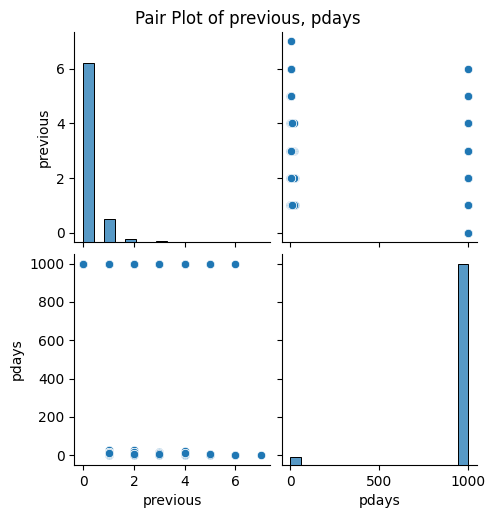

In [ ]:
# Pair plot
sns.pairplot(data=df, vars=["previous","pdays"])
plt.suptitle("Pair Plot of previous, pdays", y=1.02)
plt.show()

El gráfico compara las variables previous (número de contactos previos) y pdays (número de días desde el último contacto). Ambas están relacionadas con el historial de contacto del cliente en campañas anteriores.

La variable previous muestra una distribución fuertemente sesgada hacia valores bajos, con la mayoría de los clientes habiendo recibido entre 0 y 2 contactos anteriores. En cuanto a pdays, se observa una marcada acumulación en el valor 999, que generalmente representa que el cliente no fue contactado previamente. El resto de los valores está más distribuido por debajo de los 300 días.

En el gráfico de dispersión se aprecia una relación clara: cuando pdays es 999, previous suele ser 0, lo que confirma que no hubo contacto anterior. En los casos donde pdays es menor a 999, los valores de previous aumentan ligeramente, lo que indica presencia de interacción previa reciente.

En resumen, ambas variables están lógicamente relacionadas y reflejan patrones esperables en los datos. Sería conveniente considerar pdays = 999 como un valor especial (o convertirlo en una categoría binaria), lo que puede ayudar a mejorar la calidad de las variables en futuros modelos predictivos.

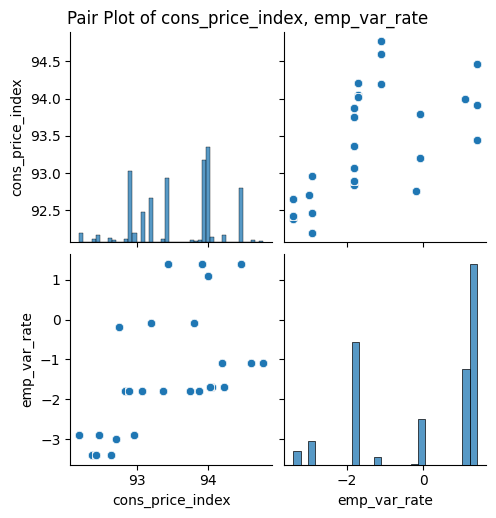

In [ ]:
# Pair plot
sns.pairplot(data=df, vars=["cons_price_index","emp_var_rate"])
plt.suptitle("Pair Plot of cons_price_index, emp_var_rate", y=1.02)
plt.show()

El análisis conjunto del cons_price_index y el emp_var_rate revela una posible relación positiva: a medida que aumenta el índice de precios al consumidor, también tiende a incrementarse la variación del empleo. Sin embargo, esta relación no es estrictamente lineal, ya que se observa una alta dispersión de puntos en ciertos rangos. Además, ambas variables presentan valores concentrados en intervalos específicos, lo que sugiere registros discretos o redondeados. En general, el gráfico sugiere una asociación entre ambas variables, aunque podrían estar influidas por otros factores no representados.


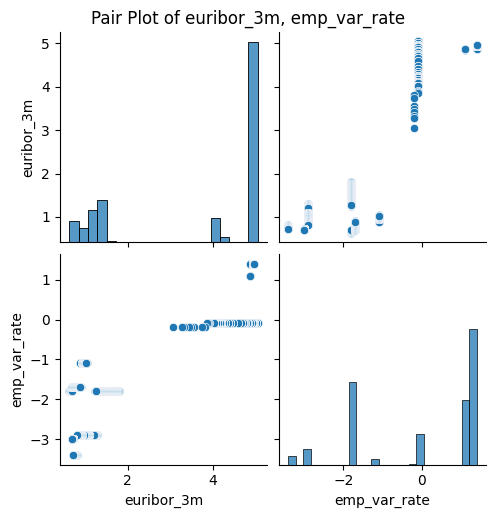

In [ ]:
# Pair plot
sns.pairplot(data=df, vars=["euribor_3m","emp_var_rate"])
plt.suptitle("Pair Plot of euribor_3m, emp_var_rate", y=1.02)
plt.show()

El gráfico revela una fuerte relación positiva entre el euríbor a 3 meses (euribor_3m) y la tasa de variación del empleo (emp_var_rate). A medida que aumenta el valor del euríbor, también lo hace la tasa de variación del empleo, lo que sugiere que ambos indicadores tienden a moverse en la misma dirección.

Sin embargo, esta relación no es continua, sino que se da en niveles discretos. En particular, se observa una gran concentración de puntos en torno a ciertos valores fijos del euríbor (como 4.9 o 5.0) y de la tasa de empleo, lo que indica que estas variables podrían estar influenciadas por decisiones de política económica o eventos específicos.

Además, los histogramas muestran una fuerte asimetría: la mayoría de los datos se agrupan en valores altos del euríbor y en valores negativos o nulos del emp_var_rate. Esto sugiere que los periodos de alta tasa de interés coinciden con contextos económicos con poca o negativa variación del empleo.

En conjunto, el gráfico indica que existe una asociación clara entre ambas variables, aunque su comportamiento escalonado sugiere que podrían estar sujetas a cambios estructurales o categorizaciones propias del conjunto de datos.



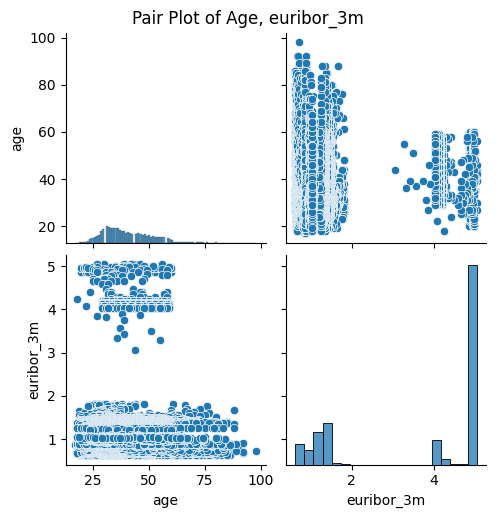

In [ ]:
# Pair plot
sns.pairplot(data=df, vars=["age","euribor_3m"])
plt.suptitle("Pair Plot of Age, euribor_3m", y=1.02)
plt.show()

El gráfico de pares presentado compara la edad del cliente (age) con la tasa de interés Euribor a 3 meses (euribor_3m), una variable macroeconómica relevante en campañas bancarias. En la diagonal se observa que la edad tiene una distribución sesgada hacia la derecha, con una alta concentración de clientes entre los 25 y 60 años. Por su parte, euribor_3m presenta una distribución bimodal, con agrupaciones en torno al 1% y al 4-5%, lo que sugiere que los datos fueron recolectados en diferentes contextos económicos.

Al observar la relación entre ambas variables, no se aprecia una correlación directa entre la edad de los clientes y el nivel del Euribor. Personas de todas las edades aparecen tanto en contextos de tasas altas como bajas, lo que indica que no hubo un sesgo etario en la estrategia de contacto de las campañas.

Finalmente, el gráfico refleja implícitamente una dimensión temporal a través de los cambios en el Euribor. Aunque no se ve una relación clara entre las variables analizadas, sería interesante incorporar una dimensión de tiempo o la variable objetivo (output) para entender mejor cómo influyen estas variables en la respuesta del cliente.

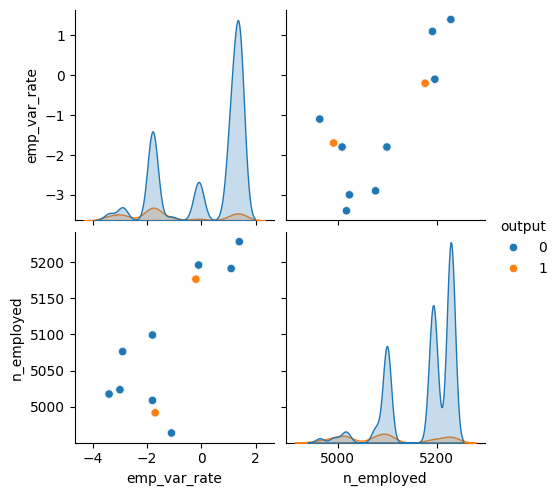

In [ ]:
sns.pairplot(df, hue="output", diag_kind="kde", vars=['emp_var_rate', 'n_employed'])
plt.show()

El gráfico muestra la relación entre la tasa de variación del empleo (emp_var_rate) y el número total de empleados (n_employed), diferenciando por la variable output, que representa la respuesta del cliente (0 = no, 1 = sí).

Los histogramas y curvas de densidad indican que ambos indicadores están fuertemente concentrados en unos pocos valores discretos, lo que sugiere que no son variables continuas en este conjunto, sino que reflejan estados económicos específicos o fechas puntuales de medición.

En cuanto a la relación entre las variables, se observa una fuerte correlación positiva: a mayor número de empleados, mayor es la tasa de variación del empleo. Esto es coherente con escenarios de expansión económica.

Respecto a la variable objetivo (output), la mayoría de los puntos donde los clientes respondieron positivamente (color naranja) se ubican en los niveles más altos de emp_var_rate y n_employed. Esto sugiere que las campañas son más efectivas en contextos económicos favorables, cuando el empleo crece y hay más personas trabajando.

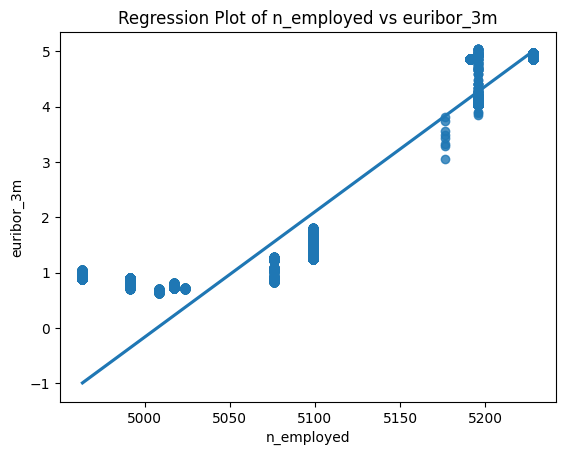

In [ ]:
# Regression plot
sns.regplot(x="n_employed", y="euribor_3m", data=df)
plt.title("Regression Plot of n_employed vs euribor_3m")
plt.show()

El gráfico muestra una clara relación positiva entre el número de empleados (n_employed) y el valor del euríbor a 3 meses (euribor_3m). A medida que aumenta el número de empleados, también lo hace el valor del euríbor, lo cual se refleja en la pendiente ascendente de la línea de regresión.

**Observaciones destacadas:**
- Los datos presentan una fuerte alineación con la recta, lo que indica una correlación positiva alta entre ambas variables.

- Se evidencia un comportamiento escalonado o agrupado: los valores no están distribuidos de forma continua, sino que se concentran en puntos específicos. Esto sugiere que ambas variables podrían haber sido registradas en fechas puntuales (por ejemplo, mensualmente o trimestralmente).

- No se aprecian valores atípicos extremos que distorsionen la tendencia general.

**Interpretación:**
Esta relación puede interpretarse como una conexión directa entre la actividad económica y la política monetaria. En contextos con más empleo (indicador de crecimiento económico), el euríbor también tiende a subir, reflejando una política de tipos de interés más elevada.

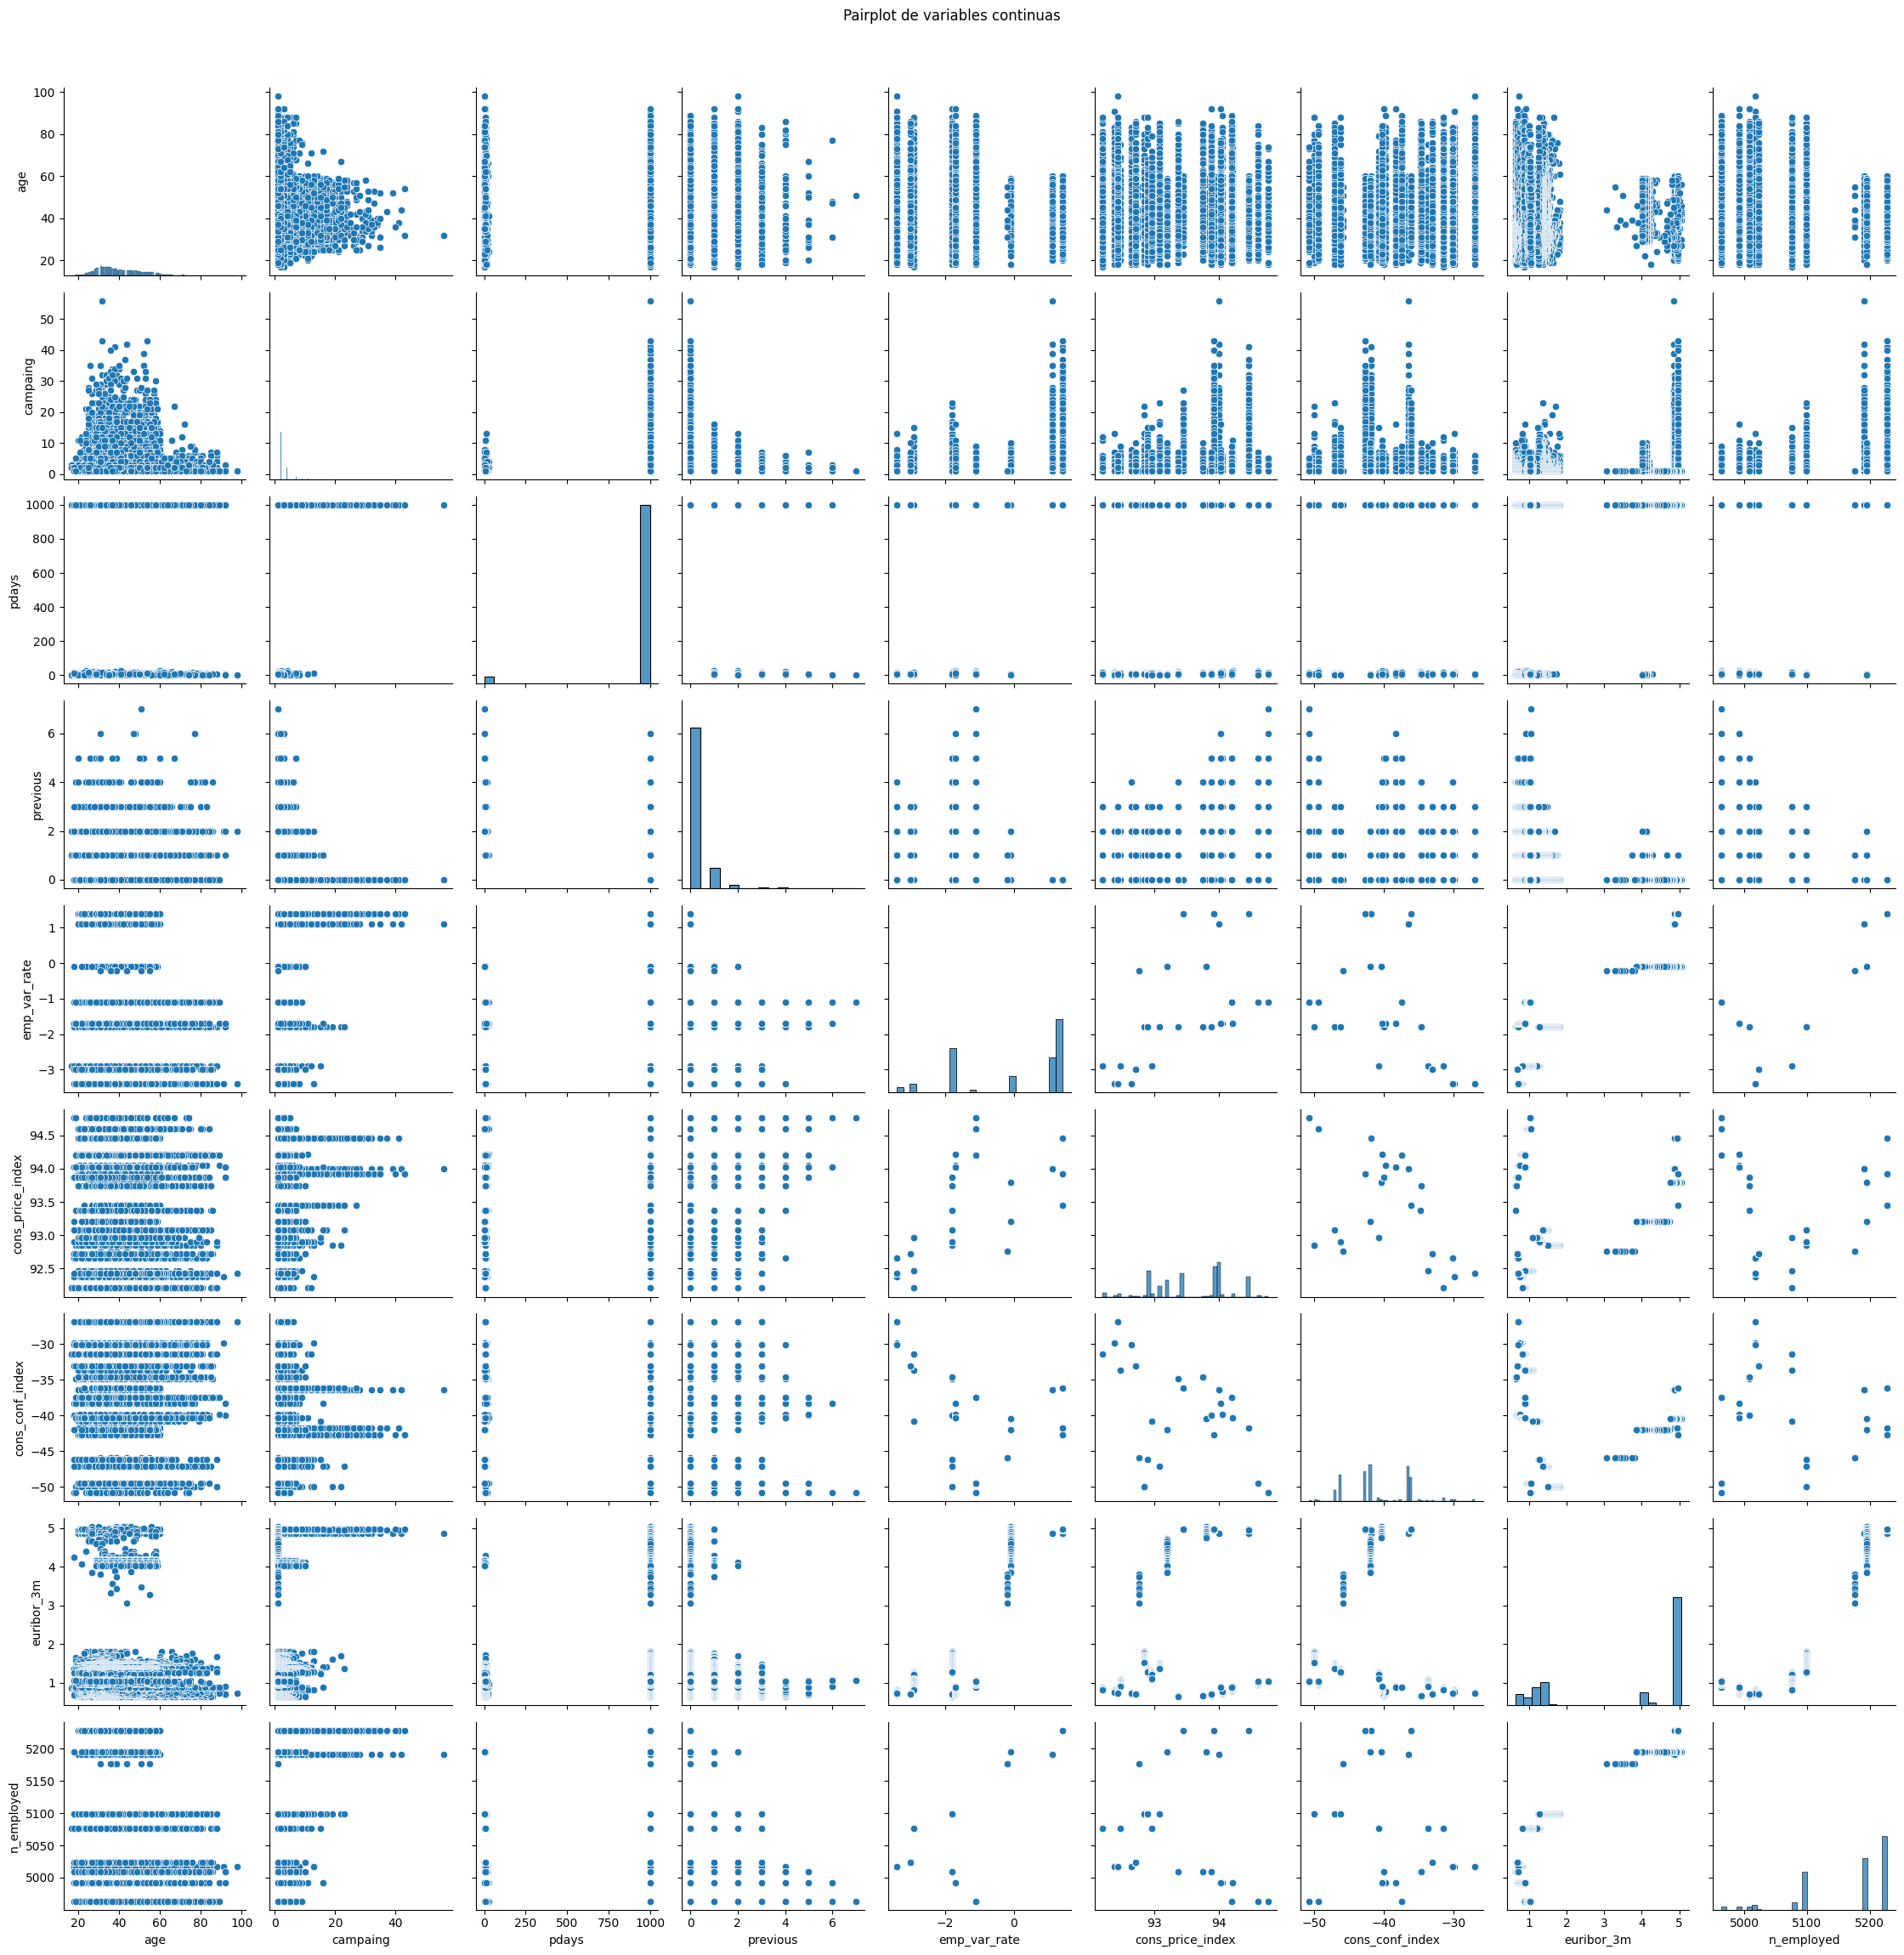

In [ ]:
# Filtrar variables continuas (exceptuando id y output si están presentes)
continuous_vars = df.select_dtypes(include=['float64', 'int64']).drop(columns=['id', 'output'], errors='ignore')

# Pairplot de variables continuas
sns.pairplot(continuous_vars)
plt.suptitle("Pairplot de variables continuas", y=1.02)
plt.tight_layout()
plt.show()

Este gráfico de pares muestra tanto la distribución univariada de cada variable (en la diagonal) como las relaciones bivariadas (fuera de la diagonal). Es una herramienta muy útil para detectar correlaciones, outliers, patrones y redundancias en datos numéricos.

**📊 Distribución de Variables (Diagonal):**
- Edad (age) presenta una distribución sesgada a la derecha, concentrando la mayoría de observaciones entre los 25 y 60 años.

- Campaing, pdays, previous tienen distribuciones muy sesgadas, con fuerte acumulación en valores bajos (o extremos como 999 en pdays).

- Índices macroeconómicos como emp_var_rate, euribor_3m y n_employed presentan distribuciones con picos definidos, lo que sugiere recolección en periodos económicos clave.

- cons_price_index y cons_conf_index muestran una menor dispersión y formas más suaves, aunque con cierta concentración en puntos específicos.

**🔗 Relaciones Bivariadas (Fuera de la Diagonal)**

- age vs campaing: No hay una relación clara; clientes de todas las edades fueron contactados con diferentes frecuencias.

- pdays vs previous: Se nota cierta relación: clientes con pdays bajo (tiempo desde el último contacto) tienden a haber sido contactados más veces antes.

- emp_var_rate vs euribor_3m: Existe una relación positiva clara, reflejando coherencia entre estas dos variables macroeconómicas.

- euribor_3m vs n_employed: Muestra una tendencia ascendente: a mayor tasa de interés, mayor número de empleados, lo cual es coherente con ciclos económicos positivos.

- cons_price_index vs cons_conf_index: Relación inversa débil. Podría haber una leve tendencia que indica que mayores precios reducen la confianza del consumidor.

La mayoría de los pares no muestran relaciones lineales evidentes, pero sí agrupaciones o bandas que podrían ser útiles en análisis posteriores.

**⚠️ Presencia de Outliers:**

campaing y pdays tienen valores extremos que destacan claramente.

También hay outliers visibles en variables como previous y n_employed, que podrían distorsionar modelos sensibles a escalas.

**✅ Conclusiones:**

- Correlaciones relevantes: Hay relaciones claras entre algunas variables macroeconómicas, lo que puede indicar redundancia o la posibilidad de usar reducción de dimensionalidad (e.g. PCA).

- Variables con sesgo: pdays, previous, campaing presentan sesgos importantes y presencia de valores extremos.

- Potencial de agrupación: Se observan formaciones que podrían ser explotadas mediante clustering o segmentación avanzada.

#### Análisis Continuas VS Categóricas

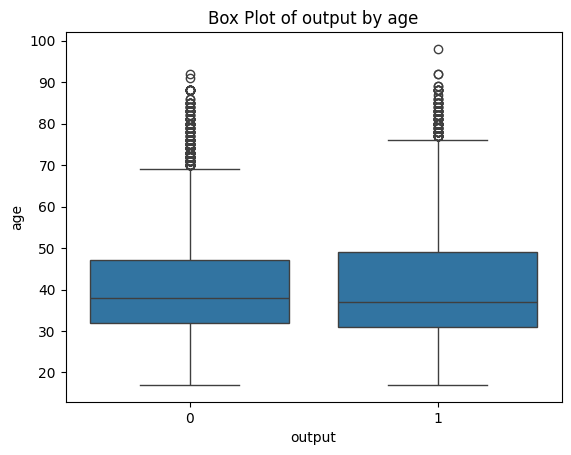

In [ ]:
# Box plot with scatter plot
sns.boxplot(x="output", y="age", data=df)
plt.title("Box Plot of output by age")
plt.show()


En ambos grupos (output = 0 y 1), la distribución de edades es bastante similar. La mediana de edad ronda los 36 años en ambos casos, lo que indica que la edad media no varía significativamente entre quienes respondieron y quienes no.

Sin embargo, se observan algunos matices interesantes:

- El grupo que respondió positivamente a la campaña (output = 1) tiene una distribución ligeramente más dispersa hacia edades más avanzadas.

- En ambos casos hay outliers por encima de los 70 años, lo que indica que existen clientes mayores con comportamiento atípico, pero consistentes entre ambas clases.

- El rango intercuartílico (IQR) es muy similar en ambos grupos, lo que sugiere que la edad por sí sola no tiene un impacto marcado sobre la probabilidad de respuesta.

Aunque hay una leve mayor dispersión hacia edades altas en los que respondieron, la edad no parece ser un factor determinante entre los que aceptaron o no la campaña. Este tipo de análisis es útil para validar hipótesis iniciales y tomar decisiones sobre la inclusión de variables en modelos predictivos. Para profundizar, podría combinarse con otras variables (como educación o historial de contacto).



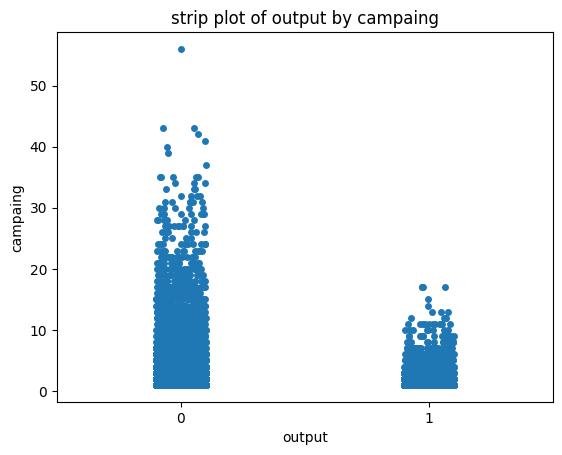

In [ ]:
sns.stripplot(data=df, x='output', y='campaing')
plt.title("strip plot of output by campaing")
plt.show()

Este gráfico es un strip plot que representa la cantidad de contactos realizados durante la campaña (campaing) en función de la respuesta del cliente (output), donde 0 indica que no respondió y 1 que sí respondió.

El gráfico muestra una diferencia clara en el número de contactos entre los dos grupos:

- Clientes que no respondieron (output = 0) fueron contactados muchas más veces. Hay numerosos casos con campañas que superan los 20 contactos, e incluso valores extremos por encima de 50.

- Clientes que sí respondieron (output = 1) se concentran principalmente en campañas con menos de 10 contactos. La densidad de puntos disminuye notablemente a medida que aumenta la cantidad de llamadas.

Este gráfico sugiere que cuantos más contactos se realizan a un cliente, menor es la probabilidad de obtener una respuesta positiva. Por el contrario, las respuestas afirmativas tienden a ocurrir con pocos intentos, lo que podría indicar que los clientes decididos lo hacen rápidamente, y que insistir muchas veces resulta poco efectivo.

Este comportamiento podría ser aprovechado para optimizar recursos en campañas futuras, limitando el número de intentos a clientes con baja probabilidad de respuesta tras cierto umbral.



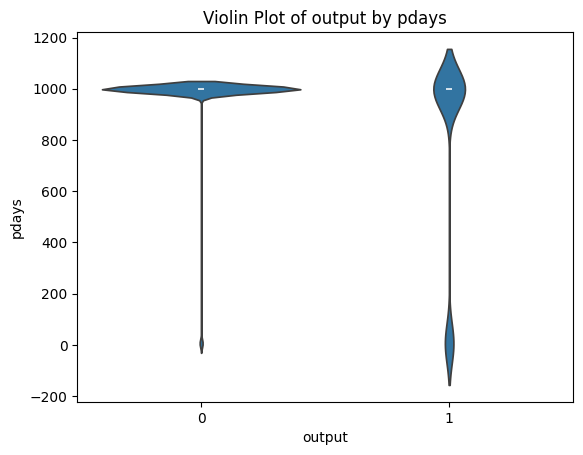

In [ ]:
sns.violinplot(x="output", y="pdays", data=df)
plt.title("Violin Plot of output by pdays")
plt.show()

Este gráfico es un violin plot que muestra la distribución de la variable pdays (número de días desde el último contacto previo) en función del resultado de la campaña (output: 0 = no respondió, 1 = respondió).

- En ambos grupos (output = 0 y 1), hay una concentración muy marcada en el valor 999, lo que típicamente indica que el cliente no fue contactado previamente. Este valor especial domina la distribución, sobre todo en quienes no respondieron.

- Entre quienes sí respondieron (output = 1), hay una mayor dispersión en los valores de pdays, con presencia significativa de clientes que fueron contactados recientemente (valores bajos). Esto sugiere que los contactos más recientes están más asociados a respuestas positivas.

- En cambio, los que no respondieron presentan una distribución mucho más concentrada en 999, lo que indica que no haber sido contactado previamente se asocia con una menor probabilidad de respuesta.

Este gráfico revela una relación importante: la historia de contacto previo afecta la respuesta del cliente. Específicamente, los clientes que han sido contactados en campañas anteriores (especialmente de forma reciente) tienen más probabilidad de responder. Por tanto, pdays puede ser una variable predictiva útil, especialmente si se trata de forma adecuada (por ejemplo, considerando 999 como una categoría especial).



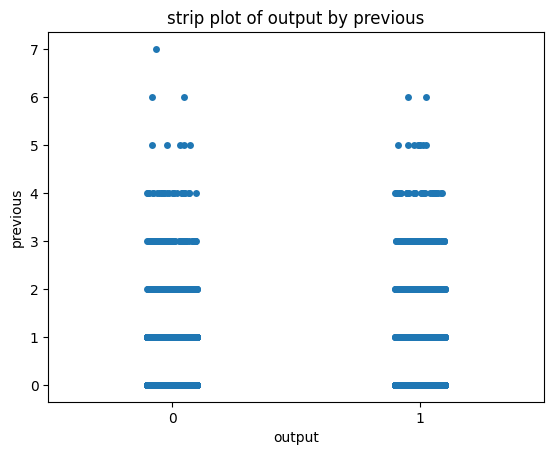

In [ ]:
# stripplot
sns.stripplot(data=df, x='output', y='previous')
plt.title("strip plot of output by previous")
plt.show()

Este gráfico es un strip plot que representa la variable previous (número de contactos anteriores a la campaña actual) en función del resultado (output: 0 = no respondió, 1 = respondió).

- Se observa que en ambos grupos (output = 0 y output = 1), los valores de previous están mayoritariamente entre 0 y 2, con unos pocos casos que llegan hasta 7.

- Aunque las distribuciones son bastante similares, hay una ligera mayor densidad de valores de previous > 0 en el grupo de output = 1, lo que sugiere que haber sido contactado previamente podría aumentar la probabilidad de respuesta.

- Los valores están discretamente espaciados, lo que indica que previous es una variable numérica con valores enteros y rango limitado, ideal para análisis de frecuencia o modelos con codificación ordinal.

Este gráfico confirma que la mayoría de los clientes fueron contactados pocas veces antes, y que los que respondieron (output = 1) tienden a tener un historial ligeramente más activo de contactos previos.

Aunque la diferencia no es drástica, la variable previous tiene potencial como predictor, especialmente si se combina con otras como pdays para capturar tanto la frecuencia como la recencia del contacto.



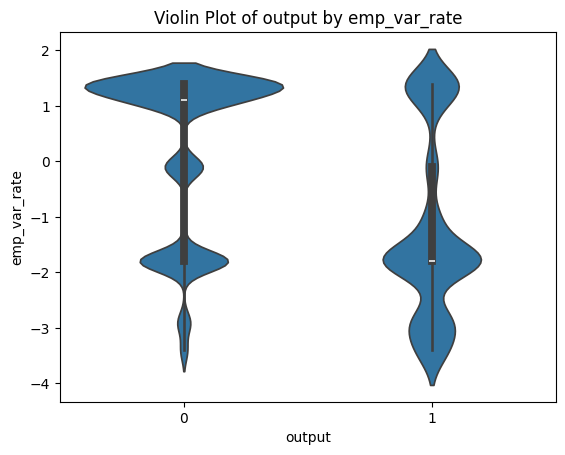

In [ ]:
# violinplot
sns.violinplot(x="output", y="emp_var_rate", data=df)
plt.title("Violin Plot of output by emp_var_rate")
plt.show()

Este gráfico es un violin plot que muestra la distribución de la tasa de variación del empleo (emp_var_rate) en función del resultado de la campaña (output: 0 = no respondió, 1 = respondió). Este tipo de gráfico combina una distribución de densidad con un box plot interno para facilitar la comparación entre categorías.


- Para output = 0 (clientes que no respondieron), la distribución de emp_var_rate está altamente concentrada en valores positivos, especialmente alrededor de 1.1 a 1.4. Esto sugiere que la mayoría de los contactos se realizaron en contextos de crecimiento económico o mejora del empleo, pero con baja efectividad.

- Para output = 1 (clientes que sí respondieron), la distribución es mucho más amplia y centrada en valores negativos, con presencia destacada en -1.8 y -3.4. Esto indica que, en contextos económicos más difíciles, los clientes mostraron mayor receptividad a las campañas.

- En ambos grupos se aprecian varios picos, lo que revela que las campañas se realizaron en momentos específicos de evolución económica y no de forma continua.


Este gráfico refuerza la idea de que las campañas bancarias fueron más efectivas cuando la situación económica era más desfavorable. A pesar de que la mayoría de los contactos se hicieron en momentos positivos (alta tasa de empleo), fue en los periodos con tasas negativas donde se obtuvieron mejores respuestas.

La variable emp_var_rate resulta ser altamente informativa y debería considerarse clave en modelos predictivos, especialmente si se trata como variable categórica o ordinal.



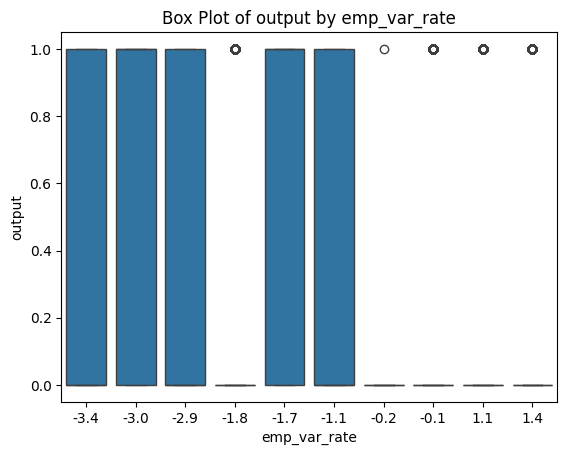

In [ ]:
# Box plot with scatter plot
sns.boxplot(y="output", x="emp_var_rate", data=df)
plt.title("Box Plot of output by emp_var_rate")
plt.show()

Este box plot muestra la variable de respuesta (output) en función de la tasa de variación del empleo (emp_var_rate), una variable macroeconómica categorizada.

- Para valores negativos de emp_var_rate (como -3.4, -3.0, -2.9, -1.8, -1.7, -1.1), el output tiende a ser 1, es decir, hay más respuestas positivas. Las cajas están centradas en 1, lo que indica que en contextos económicos desfavorables hubo mejor rendimiento de la campaña.

- En cambio, para valores positivos o neutros de emp_var_rate (como -0.2, -0.1, 0.1, 1.1, 1.4), el output se concentra en 0, lo que sugiere menos respuestas positivas en contextos con crecimiento del empleo.

- Los puntos fuera de las cajas son outliers, es decir, respuestas que se apartan del patrón general esperado para cada valor de la variable económica.


El gráfico revela un patrón llamativo: las campañas fueron más efectivas en contextos de desempleo o recesión, donde las tasas de empleo eran negativas. Esto puede deberse a que los clientes, en contextos económicos más difíciles, están más receptivos a las ofertas bancarias.

Esta relación no es lineal, pero sí categóricamente significativa, por lo que emp_var_rate es una variable predictiva potente y debería ser tratada como una categoría en modelos o decisiones de segmentación.



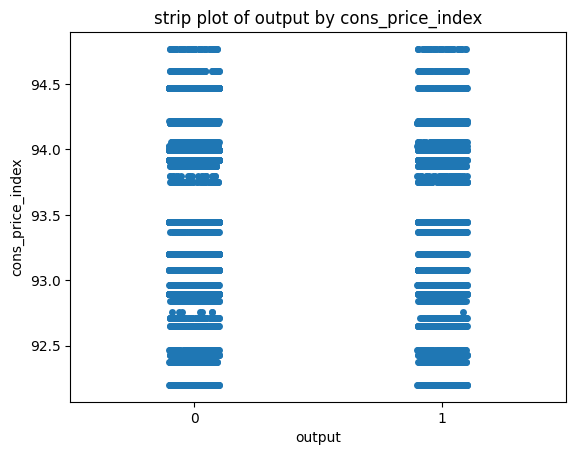

In [ ]:
# stripplot
sns.stripplot(data=df, x='output', y='cons_price_index')
plt.title("strip plot of output by cons_price_index")
plt.show()

- Los valores del cons_price_index están agrupados en escalones discretos, lo que indica que esta variable, aunque numérica, toma valores fijos o medidos en intervalos específicos (por ejemplo: 92.5, 93.0, 94.0...).

- Tanto para output = 0 como para output = 1, los puntos están distribuidos en los mismos niveles de cons_price_index. Esto indica que ambos grupos fueron contactados bajo condiciones similares de precios.

- A simple vista, no hay una diferencia drástica en la dispersión entre quienes respondieron y quienes no. Sin embargo, podría haber diferencias sutiles en la frecuencia relativa, es decir, en la proporción de respuestas positivas para cada nivel de precios.


Aunque el gráfico no muestra una separación clara entre los grupos, sí permite concluir que el cons_price_index fue constante a lo largo de distintas campañas y que los clientes respondieron en todos los contextos de precios.

Para entender si existe una relación real entre precios y respuesta, sería necesario calcular la tasa de conversión (output=1) por cada valor de cons_price_index. Si deseas, puedo ayudarte a visualizar eso con un gráfico de barras o línea.

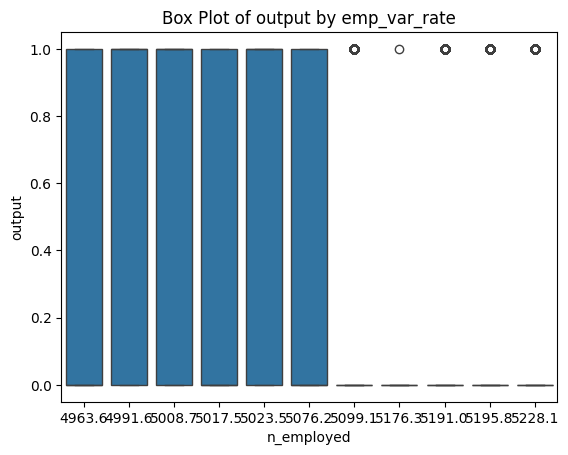

In [ ]:
# Box plot with scatter plot
sns.boxplot(y="output", x="n_employed", data=df)
plt.title("Box Plot of output by emp_var_rate")
plt.show()

Este gráfico evidencia una relación inversa entre el nivel de empleo y la efectividad de la campaña: cuando hay menos empleados en el mercado (posiblemente reflejando una crisis o contexto difícil), los clientes están más dispuestos a responder. En cambio, cuando la economía va bien y el empleo es alto, las campañas pierden efectividad.

Esto hace de n_employed una variable predictiva altamente relevante, que puede utilizarse para segmentar temporalmente las campañas o enriquecer modelos de predicción de respuesta.



#### Análisis Categóricas VS Categóricas


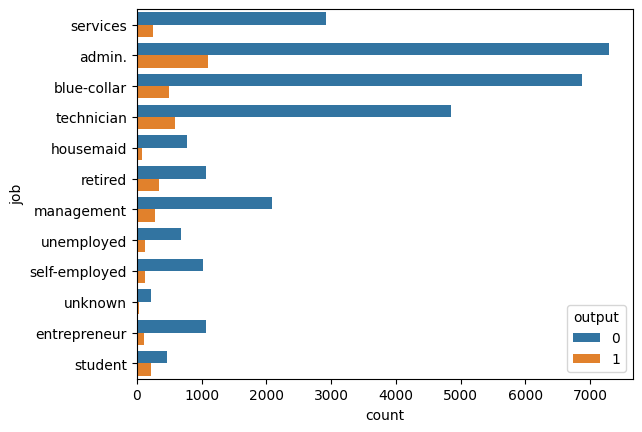

In [ ]:
# Box plot with scatter plot
sns.countplot(hue="output", y="job", data=df)
plt.show()

Este gráfico es un countplot horizontal que muestra la distribución del resultado de campaña (output) según el tipo de ocupación (job) del cliente. Es útil para identificar qué perfiles laborales tienden a responder más o menos a las campañas.

**Las ocupaciones con mayor volumen de contactos son:** admin., blue-collar, technician y services, todas con más de 3000 observaciones, pero con una proporción baja de respuestas positivas (output = 1). Especialmente, los sectores blue-collar y technician tienen muchas campañas pero baja efectividad.

**En contraste, categorías como:** student, retired, admin., y management tienen una mayor proporción relativa de respuestas positivas, aunque en menor volumen absoluto. Por ejemplo, student y retired tienen barras pequeñas, pero con una presencia más visible de output = 1.

Categorías como unknown, entrepreneur y self-employed tienen baja presencia general y escasa respuesta positiva.

Podemos concluir que el tipo de ocupación tiene un impacto directo en la efectividad de la campaña. Profesiones como admin. y student parecen responder mejor, mientras que los sectores de blue-collar o services, a pesar de ser altamente contactados, muestran muy bajas tasas de respuesta.

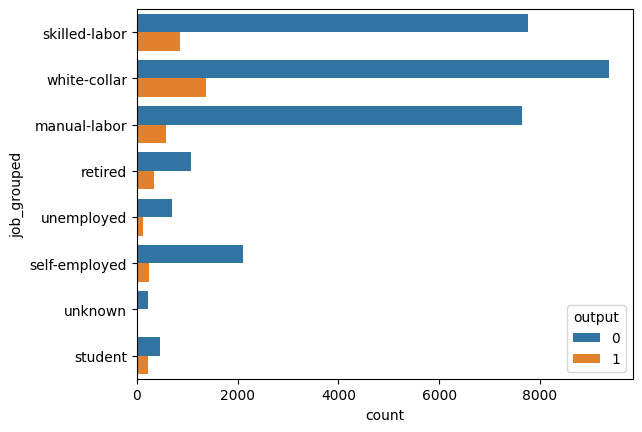

In [ ]:
# Box plot with scatter plot
sns.countplot(hue="output", y="job_grouped", data=df)
plt.show()

Agrupar las ocupaciones en categorías más generales (job_grouped) permite observar que los perfiles white-collar y técnicos calificados tienen mayores tasas absolutas de respuesta, lo cual podría reflejar mayor afinidad con las ofertas de campaña o mayor acceso/capacidad de decisión financiera.

Esta variable agrupada es útil para modelos predictivos, ya que reduce la cardinalidad de la variable original job sin perder información relevante, y permite segmentar con mayor claridad.



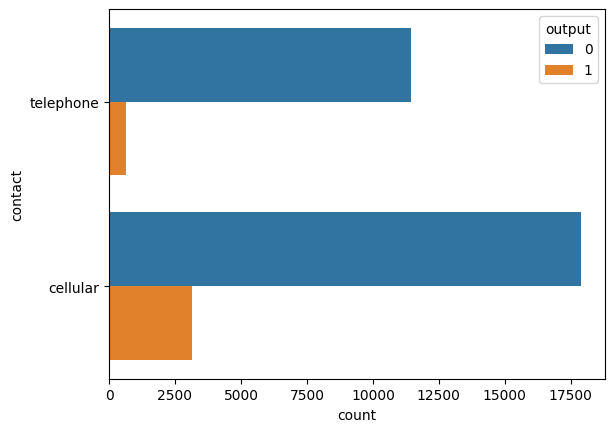

In [ ]:
# Box plot with scatter plot
sns.countplot(hue="output", y="contact", data=df)
plt.show()

Este gráfico de barras apiladas muestra la relación entre el tipo de contacto utilizado (contact) y la respuesta del cliente (output: 0 = no respondió, 1 = respondió) en una campaña de marketing.


- Los contactos se realizaron a través de dos canales: cellular y telephone.

- El canal cellular fue el más utilizado, con casi 18,000 contactos, seguido por telephone, con unos 11,000.

- Lo más destacable es que, aunque ambos canales tienen un alto número de intentos, la mayoría de las respuestas positivas (output = 1) provienen del canal cellular.

- Por el contrario, el contacto por telephone muestra una tasa de respuesta muy baja, con una gran mayoría de output = 0.

✅ Conclusión

El canal de contacto influye significativamente en la efectividad de la campaña. El uso del móvil (cellular) genera muchas más respuestas positivas, posiblemente porque permite mayor inmediatez, accesibilidad o cercanía. En cambio, el teléfono fijo parece ser mucho menos efectivo.

Este hallazgo es clave para la estrategia: conviene priorizar el uso de canales móviles en futuras campañas. Además, esta variable contact puede ser muy útil en modelos predictivos como factor categórico relevante.



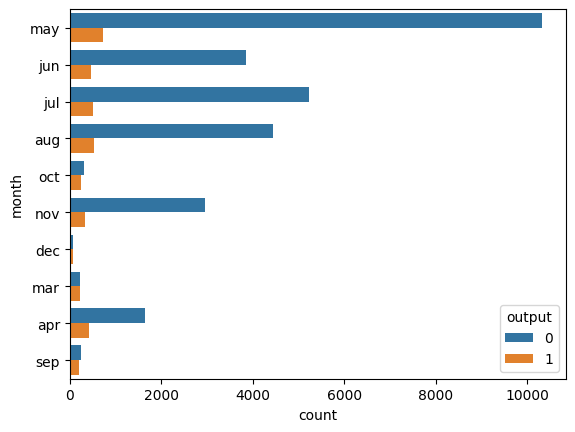

In [ ]:
# Box plot with scatter plot
sns.countplot(hue="output", y="month", data=df)
plt.show()

Este gráfico de barras apiladas muestra la cantidad de contactos realizados por mes (month) junto con el resultado de la campaña (output: 0 = no respondió, 1 = respondió). Es útil para identificar patrones temporales en la efectividad de la campaña.



- Mayo (may) es el mes con mayor volumen de contactos, superando ampliamente al resto. Sin embargo, la mayoría de ellos no generaron respuesta positiva (output = 0), lo que sugiere que el alto volumen no se tradujo en efectividad.

- Meses como julio (jul), agosto (aug), y junio (jun) también presentan altos volúmenes, pero con proporciones de respuesta ligeramente mejores en comparación con mayo.

- Abril (apr) y noviembre (nov) muestran un número moderado de contactos, pero con una relación más equilibrada entre respuestas positivas y negativas.

- Meses como octubre, marzo, diciembre y septiembre tienen muy pocos contactos en general, lo que podría deberse a menor actividad de campaña.



El mes de contacto influye tanto en el volumen como en la efectividad de la campaña. Aunque mayo concentra la mayor parte de los esfuerzos, no es necesariamente el más exitoso en términos de conversión. Meses con menor volumen como abril o noviembre podrían tener mejores tasas de conversión relativas.

Esta variable (month) es relevante para análisis de estacionalidad o para optimizar el calendario de campañas, y puede mejorar el rendimiento de modelos si se transforma en una variable categórica o se usa para extraer patrones temporales.



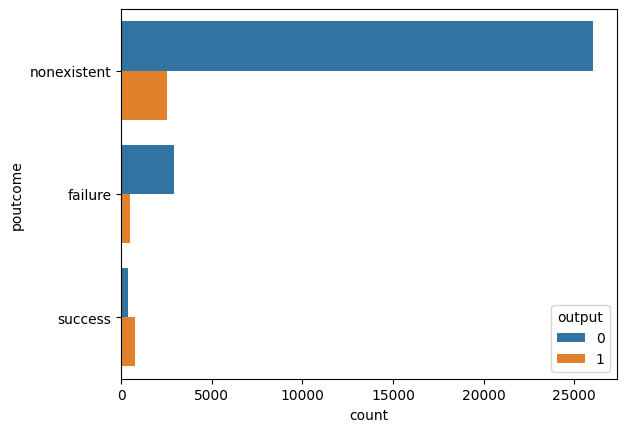

In [ ]:
# Box plot with scatter plot
sns.countplot(hue="output", y="poutcome", data=df)
plt.show()

Este gráfico de barras apiladas muestra el impacto del resultado de campañas anteriores (poutcome) en la respuesta a la campaña actual (output: 0 = no respondió, 1 = respondió). Las categorías de poutcome son:

- nonexistent: el cliente no fue contactado en campañas anteriores.

- failure: fue contactado anteriormente, pero no se logró una conversión.

- success: fue contactado anteriormente y respondió positivamente.

📊 Análisis del Countplot: output vs poutcome
- La mayoría de los clientes tienen poutcome = nonexistent, es decir, no participaron en campañas anteriores. Aunque hay muchas respuestas negativas en este grupo, también contiene la mayor cantidad de respuestas positivas absolutas, simplemente porque el volumen total es muy alto.

- El grupo failure muestra una alta proporción de respuestas negativas (output = 0) y muy pocas respuestas positivas, lo que sugiere que haber fallado en una campaña previa reduce la probabilidad de éxito actual.

- En contraste, el grupo success, aunque pequeño en volumen, muestra una proporción significativamente mayor de respuestas positivas, lo que indica que un cliente que respondió positivamente en el pasado tiene más probabilidad de hacerlo de nuevo.

El resultado de campañas anteriores es un predictor importante del comportamiento futuro. Mientras que los clientes nuevos o sin historial (nonexistent) pueden responder en función de otros factores, quienes tuvieron una experiencia exitosa previa (success) son más propensos a volver a responder positivamente.

La variable poutcome es valiosa y debería incluirse como variable categórica en cualquier modelo de predicción. También puede ser útil para segmentar campañas: por ejemplo, priorizar a clientes que ya respondieron bien antes.



## Feature Engineering
Apply here all the transformations you consider necessary for training a model.

In [ ]:
train_transformed = train_df[['age','campaing','pdays',
                              'previous','emp_var_rate', 'cons_price_index',
                              'cons_conf_index', 'euribor_3m', 'n_employed',
                              'output']]

In [ ]:
train_transformed.head()

,age,campaing,pdays,previous,emp_var_rate,cons_price_index,cons_conf_index,euribor_3m,n_employed,output
0,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,45,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,59,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
# 1. Imports básicos
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


In [ ]:
# 2. Funciones auxiliares

# 1) Winsorizer para capping
from sklearn.base import BaseEstimator, TransformerMixin
class Winsorizer(BaseEstimator, TransformerMixin):
    def __init__(self, lower_quantile=0.01, upper_quantile=0.99):
        self.lower_quantile = lower_quantile
        self.upper_quantile = upper_quantile
    def fit(self, X, y=None):
        self.lower_ = np.quantile(X, self.lower_quantile, axis=0)
        self.upper_ = np.quantile(X, self.upper_quantile, axis=0)
        return self
    def transform(self, X):
        return np.clip(X, self.lower_, self.upper_)


In [ ]:
# 2) Función para discretizar (add_bins)
def add_bins(df, age_edges, euribor_edges, emp_var_edges, n_employed_edges):
    df = df.copy()
    df['age_bin']       = pd.cut(df['age'], bins=age_edges,
                                 labels=['Joven','Adulto','Senior','Mayor'])
    df['pdays_bin']     = np.where(df['pdays']==999, 'no_contact', 'recent_contact')
    df['euribor_bin']   = pd.cut(df['euribor_3m'], bins=euribor_edges,
                                 labels=['bajo','medio','alto'], include_lowest=True)
    df['emp_var_bin']   = pd.cut(df['emp_var_rate'], bins=emp_var_edges,
                                 labels=['desempleo_alto','estabilidad'], include_lowest=True)
    df['n_employed_bin']= pd.cut(df['n_employed'], bins=n_employed_edges,
                                 labels=['bajo','medio','alto'], include_lowest=True)
    return df


In [ ]:
#3. Definición de bins y Discretización
# 1) Definimos los cortes basados en train
age_edges     = [0,25,40,60, train_df['age'].max()]
euribor_edges = [0,1.5,3,5]
emp_var_edges = [-3.5,0,1.5]
max_emp       = train_df['n_employed'].max()
n_employed_edges = sorted({4800,5000,5200,max_emp})


In [ ]:
# 2) APLICAMOS DISCRETIZACIONES
train_transformed = add_bins(train_df, age_edges, euribor_edges, emp_var_edges, n_employed_edges)


In [ ]:
#4. Listas de features
# Numéricas “naturales”
num_feats = [
    'age','campaing','pdays','previous',
    'emp_var_rate','cons_price_index','cons_conf_index',
    'euribor_3m','n_employed'
]
# categóricas created por bins
cat_feats = ['age_bin','pdays_bin','euribor_bin','emp_var_bin','n_employed_bin']
target    = 'output'

## 3.- Data Model

In [ ]:
#5. Split Train/Validation antes de cualquier preprocesado
# SEPARAMOS FEATURES / TARGET
X = train_transformed[num_feats + cat_feats]
y = train_transformed[target]

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=2022
)

In [ ]:
#6. Definición del Pipeline completo
# 1) Sub‑pipeline numérico
num_pipeline = Pipeline([
    ('winsor', Winsorizer(0.01,0.99)),
    ('scale',  StandardScaler())
])
cat_pipeline = OneHotEncoder(drop='first', handle_unknown='ignore')

preprocessor = ColumnTransformer([
    ('nums', num_pipeline, num_feats),
    ('cats', cat_pipeline, cat_feats)
])

pipeline = ImbPipeline([
    ('pre',   preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf',   RandomForestClassifier(random_state=1234, class_weight='balanced'))
])



### 3.1.- Training a Logistic Regression Model

In [ ]:
# 4. Función de evaluación con tu compute_metrics
def compute_metrics(model, X_train, y_train, X_test, y_test, trh=0.5):
    y_pr_tr = model.predict_proba(X_train)[:,1]
    y_pr_te = model.predict_proba(X_test )[:,1]
    y_pred  = (y_pr_te >= trh).astype(int)
    fpr_tr, tpr_tr, _ = metrics.roc_curve(y_train, y_pr_tr)
    fpr_te, tpr_te, _ = metrics.roc_curve(y_test,  y_pr_te)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    spec = tn/(tn+fp)
    import matplotlib.pyplot as plt
    plt.plot(fpr_tr, tpr_tr, '-r', label='train')
    plt.plot(fpr_te, tpr_te, '-b', label='test')
    plt.plot([0,1],[0,1],'--', color='gray')
    plt.legend(); plt.xlabel('FPR'); plt.ylabel('TPR'); plt.show()
    print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
    print("AUC test: ", metrics.auc(fpr_te, tpr_te))
    print("AUC trn:  ", metrics.auc(fpr_tr, tpr_tr))
    print("Recall:   ", metrics.recall_score(y_test, y_pred))
    print("Spec:     ", spec)
    print("F1:       ", metrics.f1_score(y_test, y_pred))

In [ ]:
#7. Búsqueda de hiperparámetros (Grid Search)
param_grid = {
    'clf__n_estimators':      [100,200],
    'clf__max_depth':         [6,8,10],
    'clf__min_samples_split': [2,5]
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2022)
grid = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("Mejores params:", grid.best_params_)
print("Mejor AUC CV:",  grid.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejores params: {'clf__max_depth': 6, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
Mejor AUC CV: 0.7904834473644552


In [ ]:
#8. Selección de umbral óptimo sobre validación
probs_val = best_model.predict_proba(X_val)[:,1]
ths       = np.linspace(0.1,0.9,17)
f1s       = [metrics.f1_score(y_val, probs_val>=t) for t in ths]
best_t    = ths[np.argmax(f1s)]
print("Umbral óptimo F1:", best_t, "→ F1=", max(f1s))

Umbral óptimo F1: 0.6 → F1= 0.5023041474654378


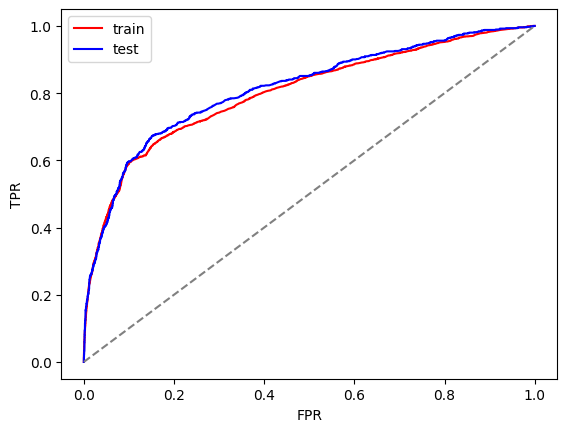

Accuracy:  0.8695258230141951
AUC test:  0.8133035358294973
AUC trn:   0.8017572551652383
Recall:    0.5797872340425532
Spec:      0.9066439522998296
F1:        0.5023041474654378


In [ ]:
#9. Evaluación final en el split
compute_metrics(
    best_model,
    X_train, y_train,
    X_val,   y_val,
    trh=best_t
)

In [ ]:
#10. Reentrenamiento sobre TODO el train
# Refit con los mejores params y TODO el dataset
# Extraemos sólo la parte après "clf__"
rf_params = {
    p.split('__')[1]: v
    for p,v in grid.best_params_.items()
    if p.startswith('clf__')
}


# Y construimos el pipeline final
pipeline_final = ImbPipeline([
    ('pre',   preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(
         random_state=1234,
         class_weight='balanced',
         **rf_params
    ))
])


# Reentrenamos sobre TODO el train
pipeline_final.fit(X, y)


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('nums',
                                                  Pipeline(steps=[('winsor',
                                                                   Winsorizer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['age', 'campaing', 'pdays',
                                                   'previous', 'emp_var_rate',
                                                   'cons_price_index',
                                                   'cons_conf_index',
                                                   'euribor_3m',
                                                   'n_employed']),
                                                 ('cats',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['age_bin', 'pdays_bin',
                                                   'euribor_bin', 'emp_var_bin',
                                                   'n_employed_bin'])])),
                ('smote', SMOTE(random_state=42)),
                ('clf',
                 RandomForestClassifier(class_weight='balanced', max_depth=6,
                                        n_estimators=200, random_state=1234))])

In [ ]:
X_train.shape

(26486, 14)

In [ ]:
train_quantiles = {}
for c in num_feats:
    train_quantiles[c] = {
        'lower': train_transformed[c].quantile(0.01),
        'upper': train_transformed[c].quantile(0.99)
    }


## Kaggle Submission

In [ ]:
## Kaggle Competition
#---> https://www.kaggle.com/t/7263970cc095d70a089870a0c4842129



In [ ]:
# Descarga el dataset de test para hacer la predicción:
import pandas as pd

if Local == True:
    !gdown https://drive.google.com/uc?id=1YOzZY6MrVyYfmW5YkKYj1afmyaAHmHvD
    valid_df = pd.read_csv('test.csv')
else:
    valid_df = pd.read_csv("/kaggle/input/2310-machine-learning-avanzado-immune/test.csv")

Downloading...
From: https://drive.google.com/uc?id=1YOzZY6MrVyYfmW5YkKYj1afmyaAHmHvD
To: /content/test.csv
100% 954k/954k [00:00<00:00, 72.7MB/s]


In [ ]:
valid_df.head()

,id,age,job,marital_status,education_level,is_default,housing_type,loan,contact,month,day_of_week,campaing,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,euribor_3m,n_employed
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,14,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,21,55,blue-collar,married,basic.4y,unknown,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


#### Feature Engineering a valid_df
Aplicar las transformaciones a valid_df (las mismas que realizaste para train_df)

In [ ]:
valid_transformed = valid_df[['age','campaing','pdays',
                              'previous','emp_var_rate', 'cons_price_index',
                              'cons_conf_index', 'euribor_3m', 'n_employed']]


In [ ]:
# 8.1 Extrae el preprocesador y el clasificador entrenado
pre = pipeline_final.named_steps['pre']
clf = pipeline_final.named_steps['clf']

# 8.2 Reconstruye la lista de columnas finales (num + dummies)
num_out = num_feats.copy()
ohe     = pre.named_transformers_['cats']
cat_out = ohe.get_feature_names_out(cat_feats).tolist()
final_cols = num_out + cat_out

# 8.3 Inyecta feature_names_in_ en el clf para que eval_best_model lo reconozca
clf.feature_names_in_ = np.array(final_cols)

# 8.4 Lee el test raw y aplícale add_bins exacto
#raw_test    = pd.read_csv("/kaggle/input/2310-machine-learning-avanzado-immune/test.csv")
test_binned = add_bins(valid_df, age_edges, euribor_edges, emp_var_edges, n_employed_edges)

# 8.5 Selecciona las columnas crudas y aplica ColumnTransformer
X_raw_test = test_binned[num_feats + cat_feats]
arr_test   = pre.transform(X_raw_test)

# 8.6 Construye valid_transformed con los nombres correctos
valid_transformed = pd.DataFrame(arr_test, columns=final_cols)


In [ ]:
#valid_transformed = add_bins( valid_transformed, age_edges, euribor_edges, emp_var_edges, n_employed_edges)

In [ ]:
#################################
#Función auxiliar (NO MODIFICAR):
#################################

def eval_best_model(final_model, valid_df):

    if Local == True:
      !gdown https://drive.google.com/uc?id=1YOzZY6MrVyYfmW5YkKYj1afmyaAHmHvD
      Id_aux = pd.read_csv('test.csv')
    else:
      Id_aux = pd.read_csv("/kaggle/input/2310-machine-learning-avanzado-immune/test.csv")

    columns = final_model.feature_names_in_
    X_valid = valid_df[columns]
    y_valid_pred = final_model.predict_proba(X_valid)[:,1]

    submission = pd.DataFrame({'id': Id_aux['id'],
                               'output': y_valid_pred})
    return (submission)

In [ ]:
submission = eval_best_model(clf, valid_transformed)

Downloading...
From: https://drive.google.com/uc?id=1YOzZY6MrVyYfmW5YkKYj1afmyaAHmHvD
To: /content/test.csv
100% 954k/954k [00:00<00:00, 131MB/s]


In [ ]:
submission.to_csv('./submission.csv', index = False)